## Analysis of Data Science community growth from 2011-2018

For this project, I was interestested in using 2011 - 2018 Stack Overflow developer survey data to understand the Data Science community growth. This notebook contains the analysis of proportion & trend in data science community growth in various countries, industries and different sized companies across the globe. And, Data science community consists of 'Database Administrator', 'Business intelligence expert', Data warehousing expert', 'Machine learning specialist', 'Data Scientist' and 'Developer with a statistics or mathematics background'. Stack Overflow is an online technology forum that has a large monthly active user base. Using the survey results, we could find out the insights of the general software engineer community as well as data science community.

### 1. Pick a dataset.

Stack Overflow developer survey data for 2011-2018 can be downloaded from [here](https://insights.stackoverflow.com/survey "Satck Overflow Data for multiple years"). I renamed individual file names to be in one format i.e. 'YYYY_survey_data.csv' where YYYY corresponds to the indvidual year of the survey results and saved them in the folder called 'data'.

In [1]:
# Import necesssary packages

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display
from copy import deepcopy

%matplotlib inline
import matplotlib.style as style
#style.available #what themes are available
#style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [2]:
# Load stack overflow survey data *.csv files from 2011 to 2018, store them in a list

path = "./data/"
all_files = glob.glob(os.path.join(path, "*.csv")) 
all_files

['./data\\2011_survey_data.csv',
 './data\\2012_survey_data.csv',
 './data\\2013_survey_data.csv',
 './data\\2014_survey_data.csv',
 './data\\2015_survey_data.csv',
 './data\\2016_survey_data.csv',
 './data\\2017_survey_data.csv',
 './data\\2018_survey_data.csv']

In [3]:
survey_schema = {}
survey_schema['2017'] = pd.read_csv('./schema/2017_survey_schema.csv')
survey_schema['2018'] = pd.read_csv('./schema/2018_survey_schema.csv')

In [4]:
# Load stack overflow survey data from 2011 to 2018, store them in a dictionary

survey_data = {}

for file in all_files:
    file_name = os.path.splitext(os.path.basename(file))[0] # Getting the file name without .csv extension
#    print(file_name)
#    print(type(file_name))
    year = file_name.split('_')[0] # Getting only the year from the filename
#    print(year)
    if year in ['2011', '2012', '2013', '2014']:
        survey_data[year] = pd.read_csv(path + file_name + '.csv', header = [0,1],\
                                        encoding= 'latin_1', low_memory=False)
    elif year in ['2015']:
        survey_data[year] = pd.read_csv(path + file_name + '.csv', skiprows= 1,\
                                        encoding= 'latin_1', low_memory=False)
    else:
        survey_data[year] = pd.read_csv(path + file_name + '.csv',\
                                        encoding= 'latin_1', low_memory=False)
        
    print("data in {} survey has {} rows,{} columns".format(year, survey_data[year].shape[0],\
                                                            survey_data[year].shape[1]))

data in 2011 survey has 2813 rows,65 columns
data in 2012 survey has 6243 rows,75 columns
data in 2013 survey has 9742 rows,128 columns
data in 2014 survey has 7643 rows,120 columns
data in 2015 survey has 26086 rows,222 columns
data in 2016 survey has 56030 rows,66 columns
data in 2017 survey has 51392 rows,154 columns
data in 2018 survey has 98855 rows,129 columns


### 2. Questions

1) What is the trend in Data Science community growth from 2011 to 2018?

2) In which countries has the Data Science community grown?

3) What is the trend in Data Science community growth in various countries over the years?

4) In which Industries has the Data Science community grown and in what proportion?

5) What is the trend in Data Science community growth in various industries over the years?

6) In which companies(small, medium & large) has the Data Science community grown and in what proportion?

7) What is the trend in Data Science community growth in various different sized companies over the years?

### 3. Prepare Data

In [5]:
# Check if survey_data[year] dataframe has MultiIndex columns

mul_ind_year = []
for year in survey_data.keys():
    if type(survey_data[year].columns) is pd.core.indexes.multi.MultiIndex:
        mul_ind_year.append(year)
        print('survey_data[{}] has Columns with {}'.format(year, type(survey_data[year].columns)))
    elif type(survey_data[year].columns) is pd.core.indexes.base.Index:
        print('survey_data[{}] has Columns with {}'.format(year, type(survey_data[year].columns)))
    else:
        print('Check survey_data[{}] index type'.format(year))
print('\n{} years has MultiIndex columns'.format(mul_ind_year))

survey_data[2011] has Columns with <class 'pandas.core.indexes.multi.MultiIndex'>
survey_data[2012] has Columns with <class 'pandas.core.indexes.multi.MultiIndex'>
survey_data[2013] has Columns with <class 'pandas.core.indexes.multi.MultiIndex'>
survey_data[2014] has Columns with <class 'pandas.core.indexes.multi.MultiIndex'>
survey_data[2015] has Columns with <class 'pandas.core.indexes.base.Index'>
survey_data[2016] has Columns with <class 'pandas.core.indexes.base.Index'>
survey_data[2017] has Columns with <class 'pandas.core.indexes.base.Index'>
survey_data[2018] has Columns with <class 'pandas.core.indexes.base.Index'>

['2011', '2012', '2013', '2014'] years has MultiIndex columns


In [6]:
#change Multi-index column names
def change_MI_col_name(df):
    '''change the name of df's columns

    INPUT - 
            df - pd.Dataframe, column names of which needs to be changed
    OUTPUT -
            df - pd.Dataframe after changing column names.
    '''              
    
    
    new_columns = []
    for index,tuple_value in enumerate(list(df.columns)):
        if index >= 1:
            if "Unnamed" in tuple_value[0]:
                tuple_value = (new_columns[index-1][0],tuple_value[1])
        new_columns.append(tuple_value)
    df.columns = pd.MultiIndex.from_tuples(new_columns)
    return df

#def change_multiindex_to_simpleindex(df):
#    '''change multi index to simple index'''
#    df.columns = ['-'.join(i) if type(i) == tuple else i for i in list(df.columns)]

for i in mul_ind_year:
    survey_data[i] = change_MI_col_name(survey_data[i])
    
print("Column's names of dataframes has been changed")

Column's names of dataframes has been changed


In [7]:
for year in survey_data.keys():
    print('survey_data[{}] has {} columns'.format(year, len(survey_data[year].columns)))

survey_data[2011] has 65 columns
survey_data[2012] has 75 columns
survey_data[2013] has 128 columns
survey_data[2014] has 120 columns
survey_data[2015] has 222 columns
survey_data[2016] has 66 columns
survey_data[2017] has 154 columns
survey_data[2018] has 129 columns


After renaming the colmuns, the survey_data[year] dataframe's has the same number of columns as there were originally but with no levels.

### 3.1 Gather necessary data to answer your questions

***Select the following columns in which we are interested to answer  the questions.***

* Country
* Age
* IT/Programming experience
* Industry
* Size of company
* Occupation
* Languages
* Job/Career satisfaction
* Salary


Combine all the required above columns from all the years survey data into a single dataframe.

In [8]:
# Function to select the columns in which we are interested.
def select_column(copy_data,year,select_column_indexes,select_column_names,show_info,show_df=False):
    '''
    select columns I am interested in
        
    INPUT - 
        copy_data - dict, containg all the individual year of survey data.
        year - str, year of survey data.
        select_column_indexes - list of indexes in copy_survey_data[year] dataframe.
        select_column_names - list of column names.
        show_df - bool, whether to show df which only contains the columns in which we are interested.
            
    OUTPUT -
        df - pd.Dataframe containg all the required columns in which we are interested.        
    '''

    select_column_index = select_column_indexes
    copy_data[year] = copy_data[year].iloc[:,select_column_index]
    copy_data[year].columns = select_column_names
  
    if show_info:
        print("*" * 20 + str(year) + "*" * 20 )
        print('select %s from copy_data in %s year' %(','.join(select_column_names),year))
        print('indexes of above columns is %s\n' %str(select_column_indexes))
        #print("-" * 40)
    if show_df:
        if show_info:
            print("-"* 40 + '\n')
            print('show df after selected columns:')
            #print("-"* 40)
            print(copy_data[year].head(2))

    return copy_data[year]

In [9]:
# Function to combine required columns from all the years survey data into a single dataframe.
def combine_req_data(survey_data,show_info=True):
    '''
    Combine all the required above columns from all the years survey data into a single dataframe.
   
    INPUT - 
            survey_data - dict containg all the individual year of survey data.
    OUTPUT -
            df - pd.Dataframe containg all the required columns from the individual year survey data dataframe.
    '''

    # dict for processed data
    copy_data = {}

    # deepcopy
    for year in survey_data.keys():
        copy_data[year] = deepcopy(survey_data[year])


    # -----------------------2011--------------------
    copy_data['2011'].loc[:,'languages'] = copy_data['2011']['Which languages are you proficient in?'].\
                                                        apply(lambda x:";".join([i  for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)

    # select columns
    select_column_indexes = [0,2,3,4,5,6,65,45,44]
    select_column_names = ['country','age','IT_experience','industry','company_size','occupation','languages',\
                           'salary','job_career_satisfaction']

    copy_data['2011'] = select_column(copy_data,'2011',select_column_indexes,select_column_names,show_info)
    

    # -----------------------2012--------------------
    copy_data['2012'].loc[:,'languages'] = copy_data['2012']['Which languages are you proficient in?'].\
                                                         apply(lambda x:";".join([i  for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)
    
    # select columns
    select_column_indexes = [0,2,3,4,5,6,75,39,38]
    select_column_names = ['country','age','IT_experience','industry','company_size','occupation','languages',\
                           'salary','job_career_satisfaction']

    copy_data['2012'] = select_column(copy_data,'2012',select_column_indexes,select_column_names,show_info)
        
        
    # -----------------------2013--------------------
    copy_data['2013'].loc[:,'languages'] = copy_data['2013']['Which of the following languages or technologies '+\
                                                             'have '+'you used significantly in the past year?'].\
                                                             apply(lambda x:";".join([i  for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)
        
    # # select columns
    select_column_indexes = [0,2,3,4,5,6,128,100,99]
    select_column_names = ['country','age','IT_experience','industry','company_size','occupation','languages',\
                           'salary','job_career_satisfaction']

    copy_data['2013'] = select_column(copy_data,'2013',select_column_indexes,select_column_names,show_info)

    
    # -----------------------2014--------------------
    copy_data['2014'].loc[:,'languages'] = copy_data['2014']['Which of the following languages or technologies '+\
                                                             'have you used significantly in the past year?'].\
                                                            apply(lambda x:";".join([i  for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)
        
    # select columns
    select_column_indexes = [0,3,5,8,6,120,7]
    select_column_names = ['country','age','IT_experience','industry','occupation','languages','salary']

    copy_data['2014'] = select_column(copy_data,'2014',select_column_indexes,select_column_names,show_info)                                     

    # -----------------------2015--------------------
    # merge all of the columns about languages
    copy_data['2015'].loc[:,'languages'] = copy_data['2015'].iloc[:,10:51].\
                                                        apply(lambda x:";".join([i  for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)

    # select columns
    select_column_indexes = [0,1,4,108,5,222,106,109]
    select_column_names = ['country','age','IT_experience','industry','occupation','languages',\
                           'salary','job_career_satisfaction']

    copy_data['2015'] = select_column(copy_data,'2015',select_column_indexes,select_column_names,show_info)
    
    
    # -----------------------2016--------------------
    # select columns
    select_column_indexes = [2,5,12,21,22,10,16,14,26]
    select_column_names = ['country','age','IT_experience','industry','company_size','occupation','languages',\
                           'salary','job_career_satisfaction']

    copy_data['2016'] = select_column(copy_data,'2016',select_column_indexes,select_column_names,show_info)
    
    
    # -----------------------2017--------------------
    # merge all of the columns about occuptions
    copy_data['2017'].loc[:,'occuption'] = copy_data['2017'].iloc[:,14:18].\
                                                        apply(lambda x:";".join([i for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)
    # merge all of the columns about satisfaction
    copy_data['2017'].loc[:,'job_career_satisfaction'] = copy_data['2017'].iloc[:,[18,19,127]].\
                                                        apply(lambda x:";".join([str(i) for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)
        
    # select columns
    select_column_indexes = [3,12,9,154,88,152,155]
    select_column_names = ['country','IT_experience','company_size','occupation','languages',\
                           'salary','job_career_satisfaction']
            
    copy_data['2017'] = select_column(copy_data,'2017',select_column_indexes,select_column_names,show_info)
    
    
    # -----------------------2018--------------------
    # merge all of the columns about satisfaction
    copy_data['2018'].loc[:,'job_career_satisfaction'] = copy_data['2018'].iloc[:,12:14].\
                                                        apply(lambda x:";".join([i for i in list(x)\
                                                                                 if not pd.isna(i)]),axis=1)
                                                  
    # select columns
    select_column_indexes = [3,124,11,8,9,65,52,129]
    select_column_names = ['country','age','IT_experience','company_size','occupation','languages',\
                           'salary','job_career_satisfaction']

    copy_data['2018'] = select_column(copy_data,'2018',select_column_indexes,select_column_names,show_info)
    
    # add column 'year'
    for year in range(2011,2019):
        copy_data[str(year)]['year'] = year
    if show_info:
        print("*"*40)
        print('Added column "year" for every annual data')

    # concatenate dataframes
    combined_data = copy_data['2011']
    for year in range(2012,2019):
        combined_data = combined_data.append(copy_data[str(year)],ignore_index=True, sort=False)

    # reset_index
    #combined_data = combined_data.reset_index()

    if show_info:
        print("*"*40)
        print("All the required columns data have been concatenated from the individual dataframes's.")
        print('Concatenated data has %d rows and %d columns' %(combined_data.shape[0],combined_data.shape[1]))
        print("*"*40)



    return combined_data

In [10]:
# Combining the required data into the req_data dataframe.
req_data = combine_req_data(survey_data)

********************2011********************
select country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction from copy_data in 2011 year
indexes of above columns is [0, 2, 3, 4, 5, 6, 65, 45, 44]

********************2012********************
select country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction from copy_data in 2012 year
indexes of above columns is [0, 2, 3, 4, 5, 6, 75, 39, 38]

********************2013********************
select country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction from copy_data in 2013 year
indexes of above columns is [0, 2, 3, 4, 5, 6, 128, 100, 99]

********************2014********************
select country,age,IT_experience,industry,occupation,languages,salary from copy_data in 2014 year
indexes of above columns is [0, 3, 5, 8, 6, 120, 7]

********************2015********************
select country,age,IT_experience,indu

Adding one more feature 'data_sci' to denote if the occupation of an individual belongs to data science field or not.

In [11]:
# Adding feature 'data_sci' to denote if the occupation of an individual belongs to data science field or not. 
req_data['data_sci'] = req_data['occupation'].str.contains('.*ata|machine|learning|algorithm|business|scientist')

Mapping True to 1 and False to 0 in feature 'data_sci'.

In [12]:
# Mapping True to 1 and False to 0 in feature 'data_sci'.
req_data['data_sci'] = req_data['data_sci'].apply(lambda x: 1 if x == True else (0 if x == False else x))

In [13]:
# Finding unique value in feature 'data_sci' and their counts
req_data['data_sci'].value_counts()

0.0    200709
1.0     34513
Name: data_sci, dtype: int64

In [14]:
# Finding null values in feature 'data_sci'
req_data['data_sci'].isnull().sum()

23582

We will deal with null values in feature 'data_sci' later on in the analysis part where we will only select observations which have 'data_sci' value as 1.

After adding feature 'data_sci', shape of req_data is - 

In [15]:
# Shape of req_data dataframe
req_data.shape

(258804, 11)

In [16]:
req_data.head()

,country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction,year,data_sci
0,Africa,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,JavaScript,Student / Unemployed,FML,2011,0.0
1,Other Europe,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,Java;SQL;C,NaN,So happy it hurts,2011,0.0
2,India,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Java;JavaScript;SQL,NaN,NaN,2011,0.0
3,Germany,< 20,41310,Foundation / Non-Profit,Student,Student,Java;Haskell,Student / Unemployed,I enjoy going to work,2011,0.0
4,Other Asia,35-39,11,Software Products,Start Up (1-25),"Executive (VP of Eng, CTO, CIO, etc.)",Java;JavaScript;CSS;PHP;SQL;C++;C;Perl,"$80,000 - $100,000",It pays the bills,2011,0.0


In [17]:
# Columns in req_data dataframe
req_data.columns

Index(['country', 'age', 'IT_experience', 'industry', 'company_size',
       'occupation', 'languages', 'salary', 'job_career_satisfaction', 'year',
       'data_sci'],
      dtype='object')

In [18]:
req_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258804 entries, 0 to 258803
Data columns (total 11 columns):
country                    257082 non-null object
age                        171605 non-null object
IT_experience              218615 non-null object
industry                   81616 non-null object
company_size               166986 non-null object
occupation                 235222 non-null object
languages                  216511 non-null object
salary                     146252 non-null object
job_career_satisfaction    222156 non-null object
year                       258804 non-null int64
data_sci                   235222 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 21.7+ MB


***Checking missing data of the req_data***

In [19]:
# Checking missing data in each feature
req_data.isnull().any()

country                     True
age                         True
IT_experience               True
industry                    True
company_size                True
occupation                  True
languages                   True
salary                      True
job_career_satisfaction     True
year                       False
data_sci                    True
dtype: bool

All the features except 'year' has missing values. Feature 'year' didn't had any null values because we added the 'year' column manually.

In [20]:
# Checking for observations which have NaN values in all the features except in the feature 'year'
req_data.iloc[:,[0,1,2,3,4,5,6,7,8,10]].isnull().all(axis=1).value_counts()

False    258719
True         85
dtype: int64

So, there are 85 observations in req_data which have null values in all the features except feature 'year'. 

In [21]:
# Displaying 85 observations with NaN values in all the features except in the feature 'year'
req_data[req_data.iloc[:,[0,1,2,3,4,5,6,7,8,10]].isnull().all(axis=1) == True].head()

,country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction,year,data_sci
62239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN
62247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN
62266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN
62276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN
62306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN


In [22]:
# Finding year(s) which have observations with NaN values in all the features except in the feature 'year'
req_data[req_data.iloc[:,[0,1,2,3,4,5,6,7,8,10]].isnull().all(axis=1) == True]['year'].value_counts()

2016    85
Name: year, dtype: int64

These observations are from the 2016 survey data.

In [23]:
# Dropping these 85 observations from the req_data
all_null_index = req_data[req_data.iloc[:,[0,1,2,3,4,5,6,7,8,10]].isnull().all(axis=1) == True].index
#print(all_null_index)
req_data = req_data.drop(index = all_null_index)

All the 85 null observations has been dropped from req_data.

In [24]:
# Getting shape of the req_data dataframe after dropping null observations
req_data.shape

(258719, 11)

In [25]:
# Checking again if all the null observations has been dropped.
req_data.iloc[:,[0,1,2,3,4,5,6,7,8,10]].isnull().all(axis=1).value_counts()

False    258719
dtype: int64

From above, all the null observations has been removed from req_data dataframe.

In [26]:
# Displaying count of null values in each feature
req_data.isnull().sum().sort_values(ascending=False)

industry                   177103
salary                     112467
company_size                91733
age                         87114
languages                   42208
IT_experience               40104
job_career_satisfaction     36563
data_sci                    23497
occupation                  23497
country                      1637
year                            0
dtype: int64

In [27]:
# Displaying percentage of null values in each feature
round((req_data.isnull().mean()*100).sort_values(ascending=False),2)

industry                   68.45
salary                     43.47
company_size               35.46
age                        33.67
languages                  16.31
IT_experience              15.50
job_career_satisfaction    14.13
data_sci                    9.08
occupation                  9.08
country                     0.63
year                        0.00
dtype: float64

In [28]:
# Function to check missing data values in the req_data dataframe
def missing_data_check(df):
    '''
    INPUT - 
            data - pandas dataframe for check missing values
    OUTPUT - 
            df - pandas dataframe -- total quantity and percentage of missing values for each column.
    '''              
    
    missing_count = df.isnull().sum().sort_values(ascending = False)
    missing_percent = round((df.isnull().mean()*100).sort_values(ascending=False),2)
    df = pd.concat([missing_count, missing_percent], axis=1, keys=['missing_count', 'missing_percent'])
    return df

In [29]:
missing_data_check(req_data)

,missing_count,missing_percent
industry,177103,68.45
salary,112467,43.47
company_size,91733,35.46
age,87114,33.67
languages,42208,16.31
IT_experience,40104,15.50
job_career_satisfaction,36563,14.13
data_sci,23497,9.08
occupation,23497,9.08
country,1637,0.63


From the above, we can see that the column **industry** in **req_data** has highest percentage of missing data, whereas, column **country** has the lowest percentage of missing data. Also, since we had added colum **year** by ourselves and not from the survey daya, it has 0 missing data. 

### 3.2 Handle categorical and missing data

***Handling categorical values in feature 'country'***

In [30]:
req_data['country'].value_counts()

United States                     52176
India                             27822
United Kingdom                    20151
Germany                           17878
Canada                             9778
France                             7339
Poland                             6347
United States of America           6003
Russian Federation                 5811
Australia                          5391
Netherlands                        5050
Brazil                             4760
Italy                              4380
Spain                              4361
Sweden                             3742
Other Europe                       3245
Ukraine                            2728
Switzerland                        2655
Romania                            2544
Israel                             2326
Austria                            2113
Turkey                             2100
Belgium                            2015
Pakistan                           2010
China                              1903


Some countries are repeated,such as - 

'United States' and 'United States of America'

'Azerbaidjan' and 'Azerbaijan'

'Bosnia Herzegovina', 'Bosnia and Herzegovina' and 'Bosnia-Herzegovina'

and many others.

In [31]:
req_data['country'].value_counts().index.sort_values().tolist()

['Afghanistan',
 'Africa',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua & Deps',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australasia',
 'Australia',
 'Austria',
 'Azerbaidjan',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia Herzegovina',
 'Bosnia and Herzegovina',
 'Bosnia-Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep',
 'Central African Republic',
 'Central America',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo {Democratic Rep}',
 'Congo, Republic of the...',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',


Modifying the names of such countries to have one name.

In [32]:
# Modifying the names of countries to have one name.

req_data.loc[req_data.country == 'Antigua & Deps',['country'] ] = 'Antigua and Barbuda'
req_data.loc[req_data.country == 'Azerbaidjan', ['country']] = 'Azerbaijan'
req_data.loc[req_data.country == 'Bosnia Herzegovina', ['country']] = 'Bosnia and Herzegovina'
req_data.loc[req_data.country == 'Bosnia-Herzegovina', ['country']] = 'Bosnia and Herzegovina'
req_data.loc[req_data.country == 'Brunei Darussalam', ['country']] = 'Brunei'
req_data.loc[req_data.country == 'Central African Rep', ['country']] = 'Central African Republic'
req_data.loc[req_data.country == 'Congo {Democratic Rep}', ['country']] = 'Congo'
req_data.loc[req_data.country == 'Congo, Republic of the...', ['country']] = 'Congo'
req_data.loc[req_data.country == 'Democratic Republic of the Congo', ['country']] = 'Congo'
req_data.loc[req_data.country == 'Dominica', ['country']] = 'Dominican Republic'
req_data.loc[req_data.country == 'Guinea-Bissau', ['country']] = 'Guinea'
req_data.loc[req_data.country == 'Hong Kong (S.A.R.)', ['country']] = 'Hong Kong'
req_data.loc[req_data.country == 'Iran, Islamic Republic of...', ['country']] = 'Iran'
req_data.loc[req_data.country == 'Ireland {Republic}', ['country']] = 'Ireland'
req_data.loc[req_data.country == "Ivory Coast (Cote D'Ivoire)", ['country']] = 'Ivory Coast'
req_data.loc[req_data.country == 'Libyan Arab Jamahiriya', ['country']] = 'Libya'
req_data.loc[req_data.country == 'Macedonia [FYROM]', ['country']] = 'Macedonia'
req_data.loc[req_data.country == 'The former Yugoslav Republic of Macedonia', ['country']] = 'Macedonia'
req_data.loc[req_data.country == 'Micronesia, Federated States of...', ['country']] = 'Micronesia'
req_data.loc[req_data.country == 'Myanmar, {Burma}', ['country']] = 'Myanmar'
req_data.loc[req_data.country == 'Myanmar [Burma]', ['country']] = 'Myanmar'
req_data.loc[req_data.country == 'Korea North', ['country']] = 'North Korea'
req_data.loc[req_data.country == 'Trinidad & Tobago', ['country']] = 'Trinidad and Tobago'
req_data.loc[req_data.country == 'United Republic of Tanzania', ['country']] = 'Tanzania'
req_data.loc[req_data.country == 'United States of America', ['country']] = 'United States'
req_data.loc[req_data.country == 'Vatican City State', ['country']] = 'Vatican City'
req_data.loc[req_data.country == 'Venezuela, Bolivarian Republic of...', ['country']] = 'Venezuela'
req_data.loc[req_data.country == 'Viet Nam', ['country']] = 'Vietnam'
req_data.loc[req_data.country == 'Virgin Islands (USA)', ['country']] = 'Virgin Islands'
req_data.loc[req_data.country == 'Virgin Islands (British)', ['country']] = 'Virgin Islands'
req_data.loc[req_data.country == 'North America (Other)', ['country']] = 'Other'
req_data.loc[req_data.country == 'Other (please specify)', ['country']] = 'Other'
req_data.loc[req_data.country == 'Other Asia', ['country']] = 'Other'
req_data.loc[req_data.country == 'Other Country (Not Listed Above)', ['country']] = 'Other'
req_data.loc[req_data.country == 'Other Europe', ['country']] = 'Other'
req_data.loc[req_data.country == 'Republic of Moldova', ['country']] = 'Moldova'
req_data.loc[req_data.country == 'Russian Federation', ['country']] = 'Russia'
req_data.loc[req_data.country == 'South Sudan', ['country']] = 'Sudan'

In [33]:
req_data['country'].value_counts()

United States                     58179
India                             27822
United Kingdom                    20151
Germany                           17878
Canada                             9778
France                             7339
Russia                             6421
Poland                             6347
Australia                          5391
Netherlands                        5050
Brazil                             4760
Italy                              4380
Spain                              4361
Other                              4097
Sweden                             3742
Ukraine                            2728
Switzerland                        2655
Romania                            2544
Israel                             2326
Austria                            2113
Turkey                             2100
Iran                               2097
Belgium                            2015
Pakistan                           2010
China                              1903


Earlier there were 272 values in 'country' column and  after modification, there are 238 values.

In [34]:
req_data['country'].value_counts().index.sort_values().tolist()

['Afghanistan',
 'Africa',
 'Aland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australasia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'Brunei',
 'Bulgaria',
 'Burkina',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Central America',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "CÃ´te d'Ivoire",
 "Democratic People's Republic of Korea",
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salv

***Handling missing values in feature 'country'***

As we have all the features with missing values except 'year' and removing the data with missing values would lead to loss of useful data and would lead to loss in insights in further analysis.

Therefore, inputing missing values in feature 'country' with 'Not known'.

In [35]:
# Finding number of missing values in feature 'country'
len(req_data[req_data['country'].isnull()])

1637

In [36]:
# Replacing null values in feature 'country' with 'Not known'
req_data['country'] = req_data['country'].fillna('Not known')

In [37]:
# Checking if there are any missing value in feature 'country'
req_data['country'].isnull().any()

False

In [38]:
# Finding number of missing values in feature 'country'
len(req_data[req_data['country'].isnull()])

0

In [39]:
req_data[req_data.country == 'Not known']['country'].value_counts()

Not known    1637
Name: country, dtype: int64

Missing values in feature 'country' has been imputed with value 'Not known'.

***Handling categorical values in feature 'industry'***

In [40]:
# Getting shape of req_data
req_data.shape

(258719, 11)

In [41]:
# Checking different values in feature industry of req_data
req_data['industry'].value_counts()

Software Products          20592
Web Services                9456
Consulting                  6378
Finance / Banking           6140
Other (please specify)      5290
Internet                    3870
Education                   3647
Healthcare                  3255
Other                       3241
Media / Advertising         2738
Manufacturing               2375
Telecommunications          1982
Retail                      1977
Government                  1964
Gaming                      1825
Consumer Products           1818
Foundation / Non-Profit      949
Student                      857
Automotive                   804
Defense                      604
Aerospace                    560
Not Currently Employed       445
I'm a student                431
Advertising                  418
Name: industry, dtype: int64

In [42]:
# Number of unique values in feature industry
len(req_data['industry'].value_counts())

24

Value 'Other' in feature industry are repeated like 'Other (please specify)'. So, replacing value 'Other (please specify)' to 'Other' in feature 'industry'.

In [43]:
# Replacing value 'Other (please specify)' to 'Other' in feature 'industry'
req_data['industry'] = req_data['industry'].apply(lambda x: 'Other' if x == 'Other (please specify)' else x)

In [44]:
# Checking different values in feature industry of req_data again
req_data['industry'].value_counts()

Software Products          20592
Web Services                9456
Other                       8531
Consulting                  6378
Finance / Banking           6140
Internet                    3870
Education                   3647
Healthcare                  3255
Media / Advertising         2738
Manufacturing               2375
Telecommunications          1982
Retail                      1977
Government                  1964
Gaming                      1825
Consumer Products           1818
Foundation / Non-Profit      949
Student                      857
Automotive                   804
Defense                      604
Aerospace                    560
Not Currently Employed       445
I'm a student                431
Advertising                  418
Name: industry, dtype: int64

In [45]:
# Number of unique values in feature industry
len(req_data['industry'].value_counts())

23

So, we have 23 different feature values in feature 'industry'. Out of these 23 values, 'Student', 'Not Currently Employed' & "I'm a student" are not industries. We will handle these values later on in the analysis part.

***Handling missing values in feature 'industry'***

In [46]:
# Checking missing data in req_data
missing_data_check(req_data)

,missing_count,missing_percent
industry,177103,68.45
salary,112467,43.47
company_size,91733,35.46
age,87114,33.67
languages,42208,16.31
IT_experience,40104,15.50
job_career_satisfaction,36563,14.13
data_sci,23497,9.08
occupation,23497,9.08
year,0,0.00


In [47]:
# Finding null values in feature 'industry'
len(req_data[req_data['industry'].isnull()])

177103

In [48]:
# Finding non-null values in feature 'industry'
len(req_data[req_data['industry'].notnull()])

81616

About 68% of the values in the feature 'industry' are missing in the req_data.There are lot of missing values in feature 'industry' and we have 81616 non-values. We would try to make inference from the rest of 32% non-null values. We would be dealing with only observations which have feature 'data_sci' value as 1. Also, we would take proportion of the non-null values in feature 'industry' across year's and various industries, we will deal with missing values later on in the analysis part. 

***Handling categorical values in feature 'company_size'***

In [49]:
# Getting shape of req_data
req_data.shape

(258719, 11)

In [50]:
# Checking different values in feature 'company_size' of req_data
req_data['company_size'].value_counts()

20 to 99 employees                       25583
100 to 499 employees                     21285
10,000 or more employees                 15437
10 to 19 employees                       12110
1,000 to 4,999 employees                 11465
Fewer than 10 employees                  11286
20-99 employees                           8616
500 to 999 employees                      7116
100-499 employees                         6801
10,000+ employees                         4707
5,000 to 9,999 employees                  4621
10-19 employees                           3972
1-4 employees                             3703
1,000-4,999 employees                     3596
5-9 employees                             3069
1/25/2013                                 2706
Start Up (1-25)                           2507
500-999 employees                         2304
Mature Small Business (25-100)            1702
Fortune 1000 (1,000+)                     1550
Mid Sized (100-999)                       1496
26-100       

In [51]:
# Number of unique values in feature industry
len(req_data['company_size'].value_counts())

33

In [52]:
# Finding value_counts of unique values in feature 'company_size' of req_data in each year
for y in range(2011,2019):
    comp_size_values = pd.Series()
    comp_size_values = req_data[req_data['year'] == y]['company_size'].value_counts()
    print('*'*25 + '  ' + str(y) + '  ' + '*'*25)
    print(comp_size_values,'\n')  

*************************  2011  *************************
Start Up (1-25)                          745
Mature Small Business (25-100)           569
Fortune 1000 (1,000+)                    543
Mid Sized (100-999)                      447
Student                                  203
Other (not working, consultant, etc.)    139
Name: company_size, dtype: int64 

*************************  2012  *************************
Start Up (1-25)                          1762
Mature Small Business (25-100)           1133
Mid Sized (100-999)                      1049
Fortune 1000 (1,000+)                    1007
Student                                   505
Other (not working, consultant, etc.)     281
Name: company_size, dtype: int64 

*************************  2013  *************************
1/25/2013                                2706
26-100                                   1478
101-999                                  1467
3001                                     1263
Other (not working, con

From above, we can observe that survey didn't had data related to company size for years 2014 & 2015. For rest of the years we can see that years 2011-2013 had different ranges of company size than company size ranges for years 2016-2018. So, we have 33 different values in feature 'company_size'. Out of these 33 values, 'Student', 'Other (not working, consultant, etc.), I am not part of a company, 'I am not sure', 'Other (please specify)', 'I don't know' & 'I prefer not to answer' are not company size. We will handle these values later on in the analysis part along with few other values like 1/25/2013, 1,000-3,000 & 3001.

***Handling missing values in feature 'company_size'***

In [53]:
# Checking missing data in req_data
missing_data_check(req_data)

,missing_count,missing_percent
industry,177103,68.45
salary,112467,43.47
company_size,91733,35.46
age,87114,33.67
languages,42208,16.31
IT_experience,40104,15.50
job_career_satisfaction,36563,14.13
data_sci,23497,9.08
occupation,23497,9.08
year,0,0.00


In [54]:
# Finding null values in feature 'industry'
len(req_data[req_data['company_size'].isnull()])

91733

In [55]:
# Finding non-null values in feature 'industry'
len(req_data[req_data['company_size'].notnull()])

166986

About 36% of the values in the feature 'company_size' are missing in the req_data.There are lot of missing values in feature 'company_size' and we have 166986 non-null values. We would make inference from the rest of 64% non-null values. we will deal with missing values later on in the analysis part as we would be dealing with only observations which have feature 'data_sci' value as 1. 

### 4. Analyze and Visualize

#### Question 1

***What is the trend in Data Science community growth from 2011 to 2018?***

In [56]:
# Grouping req_data by year and finding the total number of data science experts for each year
req_data.groupby(['year'])['data_sci'].sum()

year
2011       23.0
2012       36.0
2013       64.0
2014       61.0
2015      852.0
2016     2795.0
2017     8793.0
2018    21889.0
Name: data_sci, dtype: float64

In [57]:
#Grouping req_data by year and finding the total number of observations for each year
req_data.groupby(['year'])['data_sci'].count()

year
2011     2646
2012     5737
2013     8218
2014     7346
2015    20851
2016    46934
2017    51392
2018    92098
Name: data_sci, dtype: int64

In [58]:
# Finding the total number of observations which has NaN in feature data_sci
req_data['data_sci'].isnull().sum()

23497

In [59]:
# Grouping req_data by year and finding the proportion of data science experts for each year
req_data.groupby(['year'])['data_sci'].sum()/req_data.groupby(['year'])['data_sci'].count()

year
2011    0.008692
2012    0.006275
2013    0.007788
2014    0.008304
2015    0.040861
2016    0.059552
2017    0.171097
2018    0.237671
Name: data_sci, dtype: float64

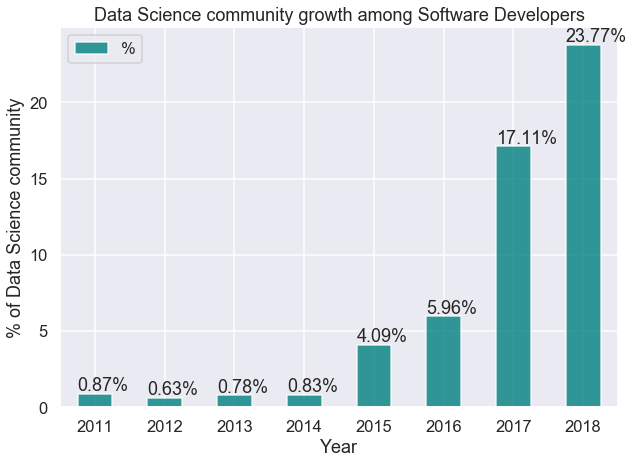

In [60]:
# Plotting the bar chart of Data Science community growth among Software Developers.
sns.set_context('talk')
sns.set_style('darkgrid')
ax =((req_data.groupby(['year'])['data_sci'].sum()/\
        req_data.groupby(['year'])['data_sci'].count())*100).\
        plot.bar(figsize = (10, 7), color='teal', alpha=0.80)

plt.xlabel('Year')
plt.ylabel('% of Data Science community')
plt.xticks(rotation = 0)
plt.legend("% data science community")
plt.title("Data Science community growth among Software Developers")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2))+ '%', (p.get_x(), p.get_height() + 0.2))
plt.show()

From the above visualization, we can observe that the Data Science community grew rapidly among total software developers. It was not prominent till 2014 but from 2015 grew in an **exponentially** manner. This goes hand in hand as we started to have the data explosion during 2014-2015 and data is exploding more ever since & to handle and make sense of this new data getting created everyday, more and more data scientists are required. So, more jobs are being created across the globe with each passing year. Hence, the rise of data science community among the total software developers can be justified.

#### Question 2

***In which countries has the Data Science community grown?***

In [61]:
# Finding the top 20 countries with data science experts
req_data[req_data['data_sci'] == 1.0]['country'].value_counts().head(20)

United States     8079
India             3125
Germany           2608
United Kingdom    2604
Canada            1276
France             891
Brazil             815
Russia             800
Australia          750
Spain              667
Netherlands        621
Italy              613
Poland             604
Switzerland        446
Sweden             441
Iran               403
Pakistan           338
Turkey             332
Mexico             328
Austria            326
Name: country, dtype: int64

Since, we need only feature 'country', 'year' and 'data_sci' to answer this question, let us group data by 'country' & 'year' feature and take only 'data_sci' feature.

In [62]:
# Making a new dataframe country_ds to be used for visualization later on
country_ds_grp = req_data.groupby(['country', 'year'])['data_sci'].sum().reset_index()
country_ds_grp.head()

,country,year,data_sci
0,Afghanistan,2015,3.0
1,Afghanistan,2016,3.0
2,Afghanistan,2017,18.0
3,Afghanistan,2018,16.0
4,Africa,2011,0.0


In [63]:
# Columns of datfarame country_ds
country_ds_grp.columns

Index(['country', 'year', 'data_sci'], dtype='object')

In [64]:
# Renaming column data_sci to data_sci_count
country_ds_grp.rename(columns={'data_sci': 'data_sci_count'}, inplace=True)

In [65]:
# Getting the name of columns after renaming
country_ds_grp.columns

Index(['country', 'year', 'data_sci_count'], dtype='object')

Let us take Top 10 countries where data science experts community has grown from 2011 to 2018 and try to visualize it to observe the trend.

In [66]:
# List of top 10 countries with data science experts
country_list_top10 = ['United States','India','United Kingdom','Germany','Canada','France','Brazil','Russia',\
                      'Australia','Spain']

In [67]:
# Making a dataframe top10_country_ds of top 10 countries with data science experts
top10_country_ds_grp = country_ds_grp.loc[country_ds_grp['country'].isin(country_list_top10)].\
                       sort_values(['country','year'])
top10_country_ds_grp = top10_country_ds_grp.reset_index()

# Dropping column index which got created after reindexing
top10_country_ds_grp.drop(['index'], axis=1, inplace=True)
top10_country_ds_grp

,country,year,data_sci_count
0,Australia,2011,2.0
1,Australia,2012,2.0
2,Australia,2013,2.0
3,Australia,2014,0.0
4,Australia,2015,22.0
5,Australia,2016,59.0
6,Australia,2017,160.0
7,Australia,2018,503.0
8,Brazil,2014,0.0
9,Brazil,2015,11.0


The total number of observations for top 10 countries for 8 years should be 80 but from the above, we can see that there are only 74 observations. Therefore, there has to few countries for which there is no data for a particular year.

In [68]:
# Function to check which country didn't had data for a particukar year

def select_country_no_data_for_year(top10_country):
    '''
    Checking which country has missing data for which year in dataframe top10_country_ds_grp
   
    INPUT - 
            top10_country - list of names of top 10 countries with data science experts.
    OUTPUT -
            print messages with the names of countries which have missing data for any year.
    '''
    
    
    
    country_less_8 = []
    country_more_8 = []
    country_equal_8 = []
    str_less_8 = ''
    str_more_8 = ''
    str_equal_8 = ''

    for x in top10_country:
        if top10_country_ds_grp[top10_country_ds_grp['country'] == x].shape[0] < 8:
            country_less_8.append(x)
        elif top10_country_ds_grp[top10_country_ds_grp['country'] == x].shape[0] > 8:
            country_more_8.append(x)
        elif top10_country_ds_grp[top10_country_ds_grp['country'] == x].shape[0] == 8:
            country_equal_8.append(x)
        else:
            print('There is something wrong with {} country. Please check.'.format(x))
     
    
    for i in country_less_8:
        str_less_8 = str_less_8 + ' ' + i
    

    for i in country_more_8:
        str_more_8 = str_more_8 + ' ' + i
    

    for i in country_equal_8:
        str_equal_8 = str_equal_8 + ' ' + i
    
    print('There are {} countries {} with data for less than 8 years.'.\
          format(len(country_less_8), str_less_8))
    print('There are {} countries {} with data for more than 8 years.'.\
          format(len(country_more_8), str_more_8))
    print('There are {} countries {} with data for each specific 8 years.'.\
          format(len(country_equal_8), str_equal_8))

In [69]:
select_country_no_data_for_year(country_list_top10)

There are 2 countries  Brazil Spain with data for less than 8 years.
There are 0 countries  with data for more than 8 years.
There are 8 countries  United States India United Kingdom Germany Canada France Russia Australia with data for each specific 8 years.


From the list of top 10 countries, 8 countries except(Brazil & Spain) have atleast 1 expert in data science field in all of the years from 2011 to 2018.

In [70]:
# checking out data science experts of Brazil and Spain from 2011 to 2018
country_ds_grp[(country_ds_grp['country'] == 'Spain') | (country_ds_grp['country'] == 'Brazil')].sort_values('country')

,country,year,data_sci_count
121,Brazil,2014,0.0
122,Brazil,2015,11.0
123,Brazil,2016,47.0
124,Brazil,2017,158.0
125,Brazil,2018,599.0
719,Spain,2014,1.0
720,Spain,2015,26.0
721,Spain,2016,59.0
722,Spain,2017,169.0
723,Spain,2018,412.0


From above, we can observe that there was no data for Brazil & Spain from 2011 to 2013.

In [71]:
# Adding rows in dataframe for Brazil & Spain from year 2011 to 2013 with data_sci_count as 0

country_dict = {}
# Making sure that only 6 rows are added in total(3 each for Brazil & Spain)
if top10_country_ds_grp.index.tolist()[-1] < 79:
    for country_name in ['Brazil','Spain']:
        for year_num in range(2011,2014):
            country_dict['country'] = country_name
            country_dict['year'] = year_num
            country_dict['data_sci_count'] = 0.0
            top10_country_ds_grp = top10_country_ds_grp.append(country_dict, ignore_index=True)
else:
    print('Please check. 3 rows for Brazil & Spain should have been already added.')
    
print('Manual observations have been added for Brazil and Spain for years from 2011 to 2013.')

Manual observations have been added for Brazil and Spain for years from 2011 to 2013.


After adding observations manually for Brazil and Spain from 2011 to 2013 in top10_country_ds_grp to help us in the visualization later on, let us check again, if there are countries in top 10 list that does not have data in top10_country_ds_grp for any specific year from 2011 to 2018.

In [72]:
select_country_no_data_for_year(country_list_top10)

There are 0 countries  with data for less than 8 years.
There are 0 countries  with data for more than 8 years.
There are 10 countries  United States India United Kingdom Germany Canada France Brazil Russia Australia Spain with data for each specific 8 years.


In [73]:
# Sorting data in top10_country_ds by features country and year
top10_country_ds_grp = top10_country_ds_grp.sort_values(['country','year']).reset_index()
top10_country_ds_grp.drop(['index'], axis=1, inplace=True)
top10_country_ds_grp.head()

,country,year,data_sci_count
0,Australia,2011,2.0
1,Australia,2012,2.0
2,Australia,2013,2.0
3,Australia,2014,0.0
4,Australia,2015,22.0


In [74]:
# Function to get percenatge of each data_sci_count value across year's for each feature
def make_perc_per_feature_across_year(df_row, df, feature):
    '''
    Function to get percenatge of each data_sci_count value across year's for each feature
   
    INPUT - 
            df_row - row of the dataframe used by apply function. 
            df - dataframe on which apply function is being used. Row of a dataframe consists of 3 columns.
            feature - colum name of the dataframe for which percentage has to be calculated aross different years.
    OUTPUT -
            perc - percentage calculated across years for a pacrticular feature.
    '''
    
    perc = (df_row.tolist()[2]/\
           df[df[feature] == df_row.tolist()[0]]['data_sci_count'].sum())*100
    return round(perc,2)

In [75]:
# Function to get percenatge of each data_sci_count value across feature categorical levels for each year
def make_perc_across_feature_per_year(df_row, df):
    '''
    Function to get percenatge of each data_sci_count value across feature categorical levels for each year
   
    INPUT - 
            df_row - row of the dataframe used by apply function. 
            df - dataframe on which apply function is being used. Row of a dataframe consists of 3 columns.
            feature - colum name of the dataframe for which percentage has to be calculated aross different feature's
                      categorical levels for a year.
    OUTPUT -
            perc - percentage calculated across feature categorical levels for a pacrticular year.
    '''
        
    perc = (df_row.tolist()[2]/\
           df[df['year'] == df_row.tolist()[1]]['data_sci_count'].sum())*100
    return round(perc,2)  

In [76]:
# Creating two new column 'data_sci_perc_per_feature_across_year' & 'data_sci_perc_across_feature_per_year'
# to be used in visualization later on. Feature refers to name of any feature in req_data_ds

top10_country_ds_grp['data_sci_perc_per_country_across_year'] = top10_country_ds_grp.\
                                                                apply(make_perc_per_feature_across_year,\
                                                                      df=top10_country_ds_grp, feature='country',\
                                                                      axis=1)
top10_country_ds_grp['data_sci_perc_across_country_per_year'] = top10_country_ds_grp.\
                                                                apply(make_perc_across_feature_per_year,\
                                                                      df=top10_country_ds_grp, axis=1)
top10_country_ds_grp.head()

,country,year,data_sci_count,data_sci_perc_per_country_across_year,data_sci_perc_across_country_per_year
0,Australia,2011,2.0,0.27,11.11
1,Australia,2012,2.0,0.27,7.14
2,Australia,2013,2.0,0.27,4.00
3,Australia,2014,0.0,0.00,0.00
4,Australia,2015,22.0,2.93,3.96


We are now all set for the visualization to see the trend of data science community growth for top 10 countries with data science experts.

In [77]:
# Function to visualize Data Science growth across year's for a particular feature
def feature_growth_count(df, x, y, feature, title):
    '''
    Function to visualize Data Science growth across year's for a particular feature
   
    INPUT - 
            x - numeric feature 'year' of the dataframe df to be used as points  on x-axis.
            y - another numeric feature of the dataframe df to be used as points on y-axis.
            df - datframe whose features has to be plotted.
            title - title of the plot.
    OUTPUT -
            pointplot of the x & y features of the dataframe df.
    '''
    
    sns.set_context('talk')
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,8))
    plt.title(title)
    with sns.color_palette('bright', 10):
        #ax = sns.lineplot(data=top10_country_ds, x='year', y='data_sci_count', hue='country')
        ax = sns.pointplot(data=df, x=x, y=y, hue=feature,scale=0.6)
    ax.set(ylabel='Data Science experts (count)')
    ax.grid(linewidth='0.5', alpha=0.75)
    plt.show()

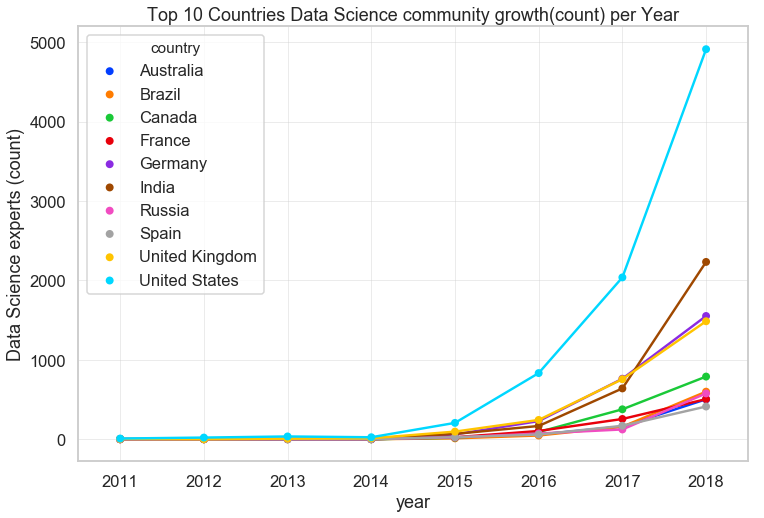

In [78]:
# Visualizing the Data Science community growth across year's for each country
feature_growth_count(top10_country_ds_grp, 'year', 'data_sci_count', 'country',\
                     'Top 10 Countries Data Science community growth(count) per Year')

 From the above visualization, we can observe the trend in growth of data science community in top 10 countries with data science experts. We can observe that United States lead the growth trend, followed by India, Germany, United Kingdom and so on. The trend observed in growth of Data Science community in United States is exponential and is at full boom whereas trend observed in growth of Data Science community in India, Germany & United Kingdom is also exponential but has not reached its full boom. For rest of the countries like Canada,Brazil,Russia,France,Australia & Spain, there is a rise in data science community but it is slow as compared to top 4 countries.
 
Since, United States has the Silicon valley and is the leader & home of large software & IT organisations, Banking,Finance and Insurance firms, Healthcare service providers, Educational institutions, Better infrastructure and is always at the top of technological and IT advancements, a large amount of data is being created everyday by these sectors and their services in United States alone. As a result, a lot more data science experts are required in United States as compared to other countries which justify the exponential growth.

India has always been a big chunk among the portion of the IT service provider countries for United States and there is a fair amount of IT workload that is being shared with India by United States. Also like United States, India has its own set of data science requirements in various sectors mentioned above. As a result, a lot of data science oppurtunities is being created in India which is leading to rapid data science community growth in India.

And the same goes with Germany & United Kingdom and rest of the other top 6 countries. Large amount of data is being created and to handle & take care of it & to make meaning from this data, requirement for data science experts is also growing rapidly in each of the country but at different rate as per the need, demand and market within each country.

In [79]:
# Function to visualize trend in proportion of Data Science growth across year(s)/feature(s) per each feature/year.
def feature_trend_prop(df, x, y, feature, title):
    '''
    Function to visualize trend in proportion of Data Science growth across year(s)/feature(s) per each feature/year.
   
    INPUT - 
            x - numeric feature 'year' of the dataframe df to be plotted on x-axis.
            y - another numeric feature of the dataframe df to be plotted on y-axis.
            df - datframe whose features has to be plotted.
            title - title of the plot.
    OUTPUT -
            pointplot of the x & y features of the dataframe df.
    '''
        
    sns.set_context('talk')
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,8))
    plt.title(title)
    with sns.color_palette('bright', 10):
        #ax = sns.lineplot(data=top10_country_ds, x='year', y='data_sci_count', hue='country')
        ax = sns.pointplot(data=df, x=x, y=y, hue=feature,scale=0.8)    
    if y == 'data_sci_perc_per_' + feature + '_across_year':
        ax.set(ylabel='Data Science experts (%) across years')
    elif y == 'data_sci_perc_across_' + feature + '_per_year':
        if feature == 'country':
            ax.set(ylabel='Data Science experts (%) across Countries')
            # Put the legend out of the figure
            # https://matplotlib.org/users/legend_guide.html#legend-location
            # https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend
            ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title=feature, fontsize=14, borderaxespad=0.)
        elif feature == 'industry':
            ax.set(ylabel='Data Science experts (%) across Industries')
            # Put the legend out of the figure
            ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title=feature, fontsize=14, borderaxespad=0.)
        elif feature == 'company_size':
            ax.set(ylabel='Data Science experts (%) across different sized Companies')
             # Put the legend out of the figure 
            if df.equals(company_size_ds_11_to_13_grp):
                ax.legend(bbox_to_anchor=(1.01, 1), loc=2, title=feature, fontsize=12, borderaxespad=0.)
            # Put the legend out of the figure
            elif df.equals(company_size_ds_16_to_18_grp):
                ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title=feature, fontsize=14, borderaxespad=0.)           
    ax.grid(linewidth='0.5', alpha=0.75)
    plt.show()

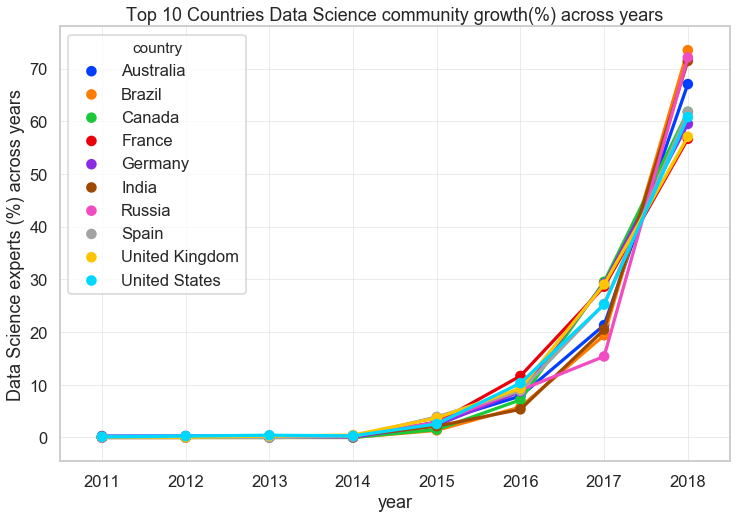

In [80]:
# Visualizing trend in proportion of Countries using Data Science across year's for each country
feature_trend_prop(top10_country_ds_grp, 'year', 'data_sci_perc_per_country_across_year', 'country',\
                    "Top 10 Countries Data Science community growth(%) across years")

From the above visualization, we can observe the trend in growth of data science community in top 10 countries but now in terms of proportion or percentage across years for a particular country. So, for each country, 2011 have lowest proportion of experts and proportion of experts increased then onwards till 2018 where the proportion is maximum. So across 8 years, 2011 has the lowest proportion of data science community and 2018 has the highest proportion for each country across 8 years and sum of proportion or percentage across 8 years for each country is 100%. Also, rise in proportion is exponential which coincides with the data getting created within the countries over the years in an exponential manner. We can clearly see, that every top 10 country with data science experts has the same pattern i.e. exponential across years but with marginal different rate.

#### Question 3

***What is the trend in Data Science community growth in various countries over the years?***

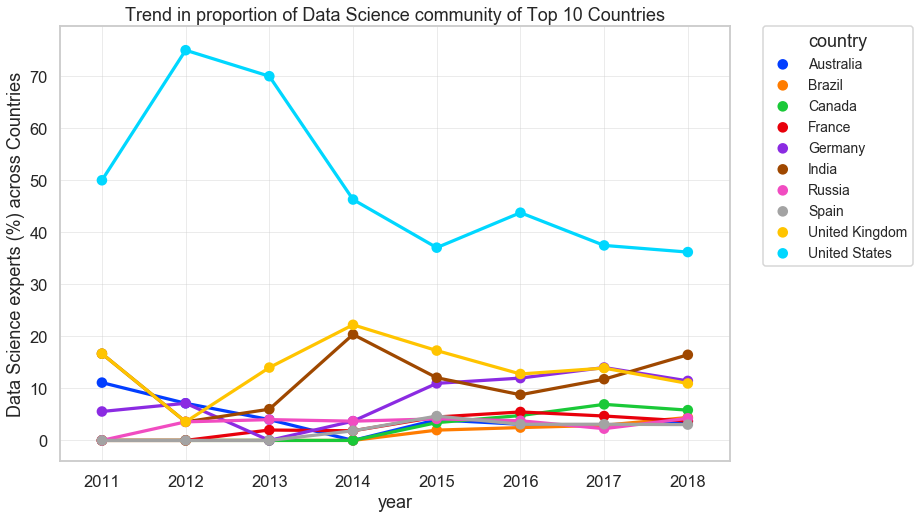

In [81]:
# Visualizing trend in proportion of Countries using Data Science across countries for each year
feature_trend_prop(top10_country_ds_grp, 'year', 'data_sci_perc_across_country_per_year', 'country',\
                    "Trend in proportion of Data Science community of Top 10 Countries")

From the above visualization, we can observe the following - 
* For year 2011, not all of the top 10 countries were actually using data science. Most of the countries were having 0 proportion of data science experts and only few countries like United States, United Kingdom, Australia & Germany had presence of data science especially United States had 50% share of the data science experts across all of the top 10 countries.
* Share of United States is way more than rest of the countries in every year. In 2011, United States held about 50% of the share of the data science experts and continued to hold higher share of data science experts across different countries in each of the years. In 2018, United States held around approx. 38% of the share of the data science experts.
* As the years passed on, the rest of the countries also started using data science and share of the proportion for rest of the countries rose up from 0 to 20%.
* Different countries had different rate of data science experts community growth, especially India rose up from 0 proportion in 2011 to around 18% in 2018.
* Germany also made an increase in their share of proportion. Australia lost its share across the years. United Kingdom first grew up and then slightly lost the proportion across years.
* Since, other countries started to have their share in proportion, United States lost its proportion for data science community but still held the highest proportion across all of the years.
* Difference between proportion of countries using data science was more in 2011 and this proportion difference started to decrease across years and in 2018, the proportion difference between the countries became less which meant each of the top 10 countries was using data science but with different proportion depending upon the need, demand & market within each of the country.

#### Question 4

***In which Industries has the Data Science community grown and in what proportion?***

In [82]:
# Getting shape of req_data
req_data.shape

(258719, 11)

In [83]:
# Creating new dataframe req_data_ds with only observations which have data science experts
req_data_ds = req_data[req_data['data_sci'] == 1.0]
req_data_ds.shape

(34513, 11)

In [84]:
# Checking missing data in req_data_ds
missing_data_check(req_data_ds)

,missing_count,missing_percent
industry,31256,90.56
salary,16112,46.68
age,15171,43.96
company_size,8233,23.85
languages,5449,15.79
IT_experience,2267,6.57
job_career_satisfaction,648,1.88
data_sci,0,0.00
year,0,0.00
occupation,0,0.00


In [85]:
# Creating dataframe industry_ds having data science experts and with no null values in feature 'industry' 
industry_ds = req_data_ds[req_data_ds['industry'].notnull()]
industry_ds.head()

,country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction,year,data_sci
12,India,25-29,41435,Software Products,Mature Small Business (25-100),Database Administrator,C#,"$20,000 - $40,000",It pays the bills,2011,1.0
287,United States,40-50,11,Software Products,Mid Sized (100-999),Database Administrator,SQL;C#,"$100,000 - $120,000",I enjoy going to work,2011,1.0
640,United States,35-39,41435,Web Services,Mature Small Business (25-100),Database Administrator,CSS;Python;SQL,"$40,000 - $60,000",It pays the bills,2011,1.0
950,Australia,51-60,11,Finance / Banking,Start Up (1-25),Database Administrator,SQL;C;Perl;PowerBuilder,">$140,000",So happy it hurts,2011,1.0
963,United States,25-29,41435,Web Services,Mature Small Business (25-100),Database Administrator,SQL;VB.NET,"$60,000 - $80,000",I enjoy going to work,2011,1.0


In [86]:
industry_ds.shape

(3257, 11)

There are lot of missing values in feature 'industry' and has only 3257 observation with non-null values. But since we woud like to have the proportion of industries using data science and not looking for an proportion with high accuracy, we can proceed further with analysis to find the answer of our question. It would provide an overall approximation of the proportion of the various industries in which data science is being used.

In [87]:
# Finding unique values and their count in feature 'industry' of industry_ds
industry_ds['industry'].value_counts()

Other                      507
Software Products          473
Finance / Banking          414
Consulting                 283
Healthcare                 228
Education                  227
Internet                   144
Government                 137
Manufacturing              119
Media / Advertising        119
Web Services                99
Telecommunications          92
Consumer Products           77
Retail                      68
Aerospace                   52
Foundation / Non-Profit     51
Defense                     49
Automotive                  44
Gaming                      37
I'm a student               24
Not Currently Employed      12
Student                      1
Name: industry, dtype: int64

In [88]:
# Finding the total number of unique values in feature 'industry'
industry_ds['industry'].value_counts().count()

22

So, we have 22 different feature values in feature 'industry'. Out of these 22 values, 'Student', 'Not Currently Employed' & "I'm a student" are not industries. Therefore, removing the observations which have these 3 as 'industry' feature value.

In [89]:
# Finding index of rows where industry feature has values 'Student', 'Not Currently Employed' & "I'm a student"
index_not_industry = industry_ds[(industry_ds['industry'] == 'Student') |\
                                      (industry_ds['industry'] == 'Not Currently Employed') |\
                                      (industry_ds['industry'] == "I'm a student")].index

In [90]:
# Removing rows where industry feature has values 'Student', 'Not Currently Employed' & "I'm a student"
industry_ds = industry_ds.drop(index = index_not_industry)

Observations having industry values as 'Student', 'Not Currently Employed' & "I'm a student" has been removed from industry_ds.

In [91]:
# Finding shape of industry_data_ds after removing rows
# where industry feature has values 'Student', 'Not Currently Employed' & "I'm a student"
industry_ds.shape

(3220, 11)

In [92]:
# Finding the total number of unique values in feature 'industry' after removing 3 non-industry values
industry_ds['industry'].value_counts().count()

19

In [93]:
# Finding the count of different unique values in feature 'industry' after removing 3 non-industry values
industry_ds['industry'].value_counts()

Other                      507
Software Products          473
Finance / Banking          414
Consulting                 283
Healthcare                 228
Education                  227
Internet                   144
Government                 137
Manufacturing              119
Media / Advertising        119
Web Services                99
Telecommunications          92
Consumer Products           77
Retail                      68
Aerospace                   52
Foundation / Non-Profit     51
Defense                     49
Automotive                  44
Gaming                      37
Name: industry, dtype: int64

In [94]:
# Finding the proportion of different industries using Data Sciecnce
round(((industry_ds['industry'].value_counts().sort_values(ascending=False)/\
industry_ds['industry'].value_counts().sort_values(ascending=False).sum())*100),2)

Other                      15.75
Software Products          14.69
Finance / Banking          12.86
Consulting                  8.79
Healthcare                  7.08
Education                   7.05
Internet                    4.47
Government                  4.25
Manufacturing               3.70
Media / Advertising         3.70
Web Services                3.07
Telecommunications          2.86
Consumer Products           2.39
Retail                      2.11
Aerospace                   1.61
Foundation / Non-Profit     1.58
Defense                     1.52
Automotive                  1.37
Gaming                      1.15
Name: industry, dtype: float64

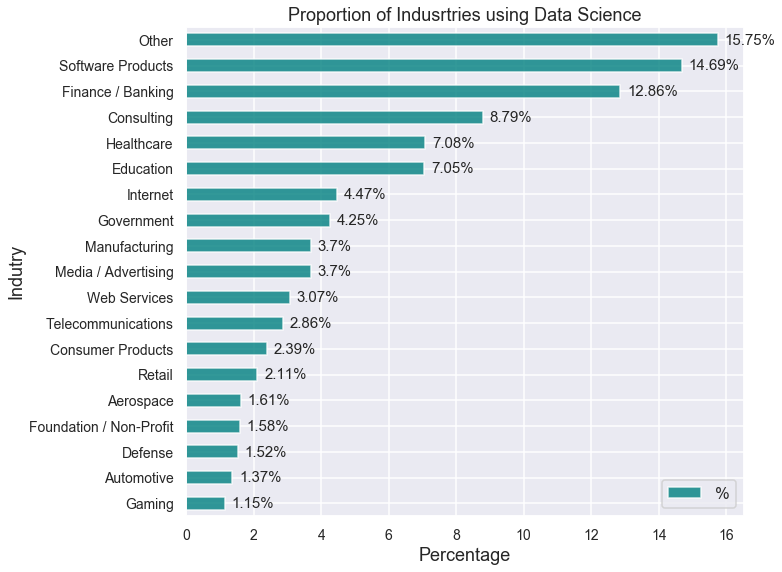

In [95]:
# Plotting the bar chart of industries in which Data Science is being used
sns.set_context('talk')
sns.set_style('darkgrid')

ax = ((industry_ds['industry'].value_counts().sort_values(ascending=True)/\
       industry_ds['industry'].value_counts().sort_values(ascending=True).sum())*100).\
                                 plot.barh(figsize = (10, 9), fontsize = 14, color='teal', alpha=0.80)

plt.xlabel('Percentage')
plt.ylabel('Indutry')
plt.xticks(rotation = 0)
plt.legend("% of Industry")
plt.title("Proportion of Indusrtries using Data Science")
for p in ax.patches:
    ax.annotate(str(round(p.get_width(), 2))+ '%', (p.get_x() + p.get_width() + 0.2, p.get_y()),\
                xytext=(0,2), textcoords='offset points', fontsize=15)
plt.show()

From the above visualization, almost all of the industries are using Data Science to much or less extent predominatingly used by Software products, Finance & Banking sector, Consulting, Healthcare & Education sector.
Also, from the visualization, we can see that the top most industry corresponds to 'Other' which denotes that Stack overflow survey(s) didn't had industries in which data science is being used. By 'Other', it could mean various industries like - Research of different kinds, Medicines, Pharmaceuticals, E-commerce, Construction, Tranportation, Insurance, Travel & Hospitality, Utilities, Natural resources & Energy, etc..

All industries and organisations alike are awashed with data in this pro-tech age and data is being created in an exponential manner, so Data Science is being used by every industry in different proportion as Data Science leads to Smarter Decision-Making. 

In the not so distant past, industries and organisations largely relied on guesswork when making crucial decisions. Big data and Data Science allowed them to look through incredible amounts of information and feel confident when figuring out how to deal with things in their respective industries.

#### Question 5

***What is the trend in Data Science community growth in various industries over the years?***

In [96]:
industry_ds.shape

(3220, 11)

In [97]:
industry_ds.head()

,country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction,year,data_sci
12,India,25-29,41435,Software Products,Mature Small Business (25-100),Database Administrator,C#,"$20,000 - $40,000",It pays the bills,2011,1.0
287,United States,40-50,11,Software Products,Mid Sized (100-999),Database Administrator,SQL;C#,"$100,000 - $120,000",I enjoy going to work,2011,1.0
640,United States,35-39,41435,Web Services,Mature Small Business (25-100),Database Administrator,CSS;Python;SQL,"$40,000 - $60,000",It pays the bills,2011,1.0
950,Australia,51-60,11,Finance / Banking,Start Up (1-25),Database Administrator,SQL;C;Perl;PowerBuilder,">$140,000",So happy it hurts,2011,1.0
963,United States,25-29,41435,Web Services,Mature Small Business (25-100),Database Administrator,SQL;VB.NET,"$60,000 - $80,000",I enjoy going to work,2011,1.0


In [98]:
# Finding number of observations in each year where we have feature 'industry' value.
industry_ds.groupby('year')['industry'].count()

year
2011      23
2012      36
2013      64
2014      60
2015     650
2016    2387
Name: industry, dtype: int64

In [99]:
# Finding number of observations in the industry_ds for year 2017 & 2018
industry_ds[(industry_ds['year'] == 2017) & (industry_ds['year'] == 2018)].shape

(0, 11)

From above, we can say that there are no observations with values in 'industry' column for year 2017 and 2018 as there was no data about industry to which an individual belonged to in survey 2017 & 2018. So while combining the data from various years to req_data, only null values got added up to feature 'industry' for year 2017 & 2018 and industry_data_ds is subset of req_data with feature 'industry' having non-null value. Therefore, we don't have any observations in industry_data_ds for year 2017 & 2018.

In [100]:
# Finding count of Data Science experts for each industry for each year 
industry_ds.groupby(['year'])['industry'].value_counts()

year  industry               
2011  Software Products            6
      Consulting                   4
      Finance / Banking            4
      Web Services                 3
      Education                    2
      Other                        2
      Healthcare                   1
      Manufacturing                1
2012  Other                        7
      Consulting                   5
      Healthcare                   4
      Software Products            4
      Education                    3
      Finance / Banking            3
      Foundation / Non-Profit      3
      Web Services                 3
      Manufacturing                2
      Gaming                       1
      Retail                       1
2013  Other                       14
      Software Products           14
      Consulting                   9
      Healthcare                   8
      Web Services                 7
      Finance / Banking            6
      Education                    2
      Fo

From above, not every year has each of the industries.

In [101]:
# Finding the count of different unique values in feature 'industry'
industry_ds['industry'].value_counts()

Other                      507
Software Products          473
Finance / Banking          414
Consulting                 283
Healthcare                 228
Education                  227
Internet                   144
Government                 137
Manufacturing              119
Media / Advertising        119
Web Services                99
Telecommunications          92
Consumer Products           77
Retail                      68
Aerospace                   52
Foundation / Non-Profit     51
Defense                     49
Automotive                  44
Gaming                      37
Name: industry, dtype: int64

In [102]:
# Making a list of top 10 industries with data science experts
industry_list_top10 = industry_ds['industry'].value_counts().index[0:10].tolist()
industry_list_top10

['Other',
 'Software Products',
 'Finance / Banking',
 'Consulting',
 'Healthcare',
 'Education',
 'Internet',
 'Government',
 'Manufacturing',
 'Media / Advertising']

In [103]:
# Making a dataframe top10_industry_ds of top 10 industries with data science experts
top10_industry_ds = industry_ds.loc[industry_ds['industry'].isin(industry_list_top10)].sort_values(['industry','year'])
top10_industry_ds = top10_industry_ds.reset_index()

# Dropping column index which got created after reindexing
top10_industry_ds.drop(['index'], axis=1, inplace=True)
top10_industry_ds.head()

,country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction,year,data_sci
0,United Kingdom,40-50,11,Consulting,Start Up (1-25),Database Administrator,JavaScript;SQL,"$120,000 - $140,000",I enjoy going to work,2011,1.0
1,Australasia,40-50,11,Consulting,Mature Small Business (25-100),Database Administrator,Python;SQL;Perl,">$140,000",It pays the bills,2011,1.0
2,South America,20-24,41310,Consulting,Mature Small Business (25-100),Database Administrator,JavaScript;SQL;C#,"$20,000 - $40,000",I enjoy going to work,2011,1.0
3,United States,25-29,41310,Consulting,Mature Small Business (25-100),Database Administrator,JavaScript;CSS;PHP;SQL,"$40,000 - $60,000",I enjoy going to work,2011,1.0
4,United States,30-34,11,Consulting,Start Up (1-25),Database Administrator,CSS;Python;Ruby;SQL;C#,"$120,000 - $140,000",Love my job,2012,1.0


In [104]:
# Finding shape of top10_industry_ds
top10_industry_ds.shape

(2651, 11)

So, from above, we have 2651 observations when we select top 10 industries.

Since, we need only feature 'industry', 'year' and 'data_sci' to answer this question, let us group data by 'industry' & 'year' feature and take only 'data_sci' feature.

In [105]:
# Grouping data in top10_industry_ds by industry & year and taking only data_sci feature
top10_industry_ds_grp = top10_industry_ds.groupby(['industry','year'])['data_sci'].sum().reset_index()
top10_industry_ds_grp.head()

,industry,year,data_sci
0,Consulting,2011,4.0
1,Consulting,2012,5.0
2,Consulting,2013,9.0
3,Consulting,2014,6.0
4,Consulting,2015,63.0


In [106]:
# Columns of datfarame top10_industry_ds_grp
top10_industry_ds_grp.columns

Index(['industry', 'year', 'data_sci'], dtype='object')

In [107]:
# Renaming column data_sci to data_sci_count
top10_industry_ds_grp.rename(columns={'data_sci': 'data_sci_count'}, inplace=True)

In [108]:
# Getting the name of columns after renaming
top10_industry_ds_grp.columns

Index(['industry', 'year', 'data_sci_count'], dtype='object')

In [109]:
# Finding shape of top10_industry_ds_grp
top10_industry_ds_grp.shape

(48, 3)

There has to be 60 rows in the top10_industry_ds_grp as there 6 years from 2011 to 2016 and we have selected top 10 industries but we have got 48 rows in the top10_industry_ds_grp. So, there should be few years fro which we don't have 'data_sci' feature value.

In [110]:
top10_industry_ds_grp

,industry,year,data_sci_count
0,Consulting,2011,4.0
1,Consulting,2012,5.0
2,Consulting,2013,9.0
3,Consulting,2014,6.0
4,Consulting,2015,63.0
5,Consulting,2016,196.0
6,Education,2011,2.0
7,Education,2012,3.0
8,Education,2013,2.0
9,Education,2014,2.0


In [111]:
# Defining function to check if the selected industries have data for all the years
def top10_industry_check_missing_year(ind_list):
    '''
    Function to check if the selected industries have data for all the years
   
    INPUT - 
            ind_list - list of names of top 10 industries using data science.
    OUTPUT -
            missing ind_list - list of names of industries which have missing data for any year.
    '''
        
    missing_ind_list = []
    for i in ind_list:
        if len(top10_industry_ds_grp[top10_industry_ds_grp['industry'] == i]) != 6:
            missing_ind_list.append(i)
    if missing_ind_list:
        print('{} industries has missing observation(s) for few years'.format(missing_ind_list))
    else:
        print('All industries have data for all the years')
    return missing_ind_list

In [112]:
industry_missing = top10_industry_check_missing_year(industry_list_top10)

['Internet', 'Government', 'Manufacturing', 'Media / Advertising'] industries has missing observation(s) for few years


In [113]:
# Manually adding observation(s) for the industries which have data missed for few years in top10_industry_ds_grp
# Manually adding 'data_sci_count' as 0.0
industry_dict ={}
if industry_missing:
    for i in industry_missing:
        for year_num in range(2011,2017):
            if len(top10_industry_ds_grp[(top10_industry_ds_grp['industry'] == i) &\
                                         (top10_industry_ds_grp['year'] ==year_num)]) == 0:
                industry_dict['industry'] = i
                industry_dict['year'] = year_num
                industry_dict['data_sci_count'] = 0.0
                top10_industry_ds_grp = top10_industry_ds_grp.append(industry_dict, ignore_index=True)
    print('Observation(s) has been manually added for the industries which have data missed for few years\
    in top10_industry_ds_grp')
else:
    print('No industries has missing observations. No manual observations were added.')

Observation(s) has been manually added for the industries which have data missed for few years    in top10_industry_ds_grp


In [114]:
# Checking again if any industry have missing data for any year
top10_industry_check_missing_year(industry_list_top10)

All industries have data for all the years


[]

In [115]:
top10_industry_ds_grp = top10_industry_ds_grp.sort_values(['industry','year']).reset_index()
top10_industry_ds_grp.drop(['index'], axis=1, inplace=True)
top10_industry_ds_grp

,industry,year,data_sci_count
0,Consulting,2011,4.0
1,Consulting,2012,5.0
2,Consulting,2013,9.0
3,Consulting,2014,6.0
4,Consulting,2015,63.0
5,Consulting,2016,196.0
6,Education,2011,2.0
7,Education,2012,3.0
8,Education,2013,2.0
9,Education,2014,2.0


In [116]:
# Creating two new column 'data_sci_perc_per_feature_across_year' & 'data_sci_perc_across_feature_per_year'
# to be used in visualization later on
top10_industry_ds_grp['data_sci_perc_per_industry_across_year'] = top10_industry_ds_grp.\
                                                                  apply(make_perc_per_feature_across_year,\
                                                                        df=top10_industry_ds_grp, feature='industry',
                                                                        axis=1)
top10_industry_ds_grp['data_sci_perc_across_industry_per_year'] = top10_industry_ds_grp.\
                                                                  apply(make_perc_across_feature_per_year,\
                                                                        df=top10_industry_ds_grp, axis=1)
top10_industry_ds_grp.head()

,industry,year,data_sci_count,data_sci_perc_per_industry_across_year,data_sci_perc_across_industry_per_year
0,Consulting,2011,4.0,1.41,20.00
1,Consulting,2012,5.0,1.77,17.86
2,Consulting,2013,9.0,3.18,16.67
3,Consulting,2014,6.0,2.12,11.76
4,Consulting,2015,63.0,22.26,11.56


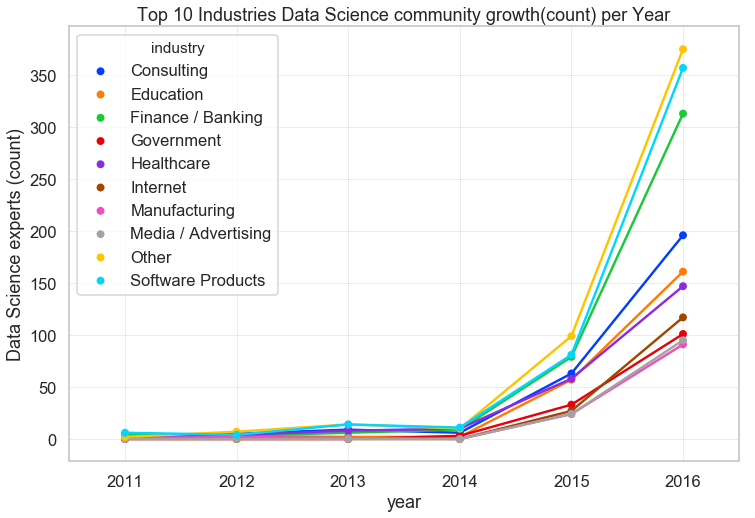

In [117]:
# Visualizing the Data Science community growth across year's for each industry
feature_growth_count(top10_industry_ds_grp, 'year', 'data_sci_count', 'industry',\
                     'Top 10 Industries Data Science community growth(count) per Year')

* From the above visualization, we can observe the trend in growth of data science community in top 10 industries with data science experts. We can observe that 'Other' lead the growth trend, followed by Software Products, Finance/Banking and so on. 'Other' industry here could collaboratively mean industries like - Research of different kinds, Medicines, Pharmaceuticals, E-commerce, Construction, Transportation, Insurance, Travel & Hospitality, Utilities, Natural resources & Energy, etc.
* The trend observed in growth of Data Science community in Software Products & Finance/Banking is exponential whereas trend observed in growth of Data Science community in Consulting, Education, Healthcare is also upwards but slow in comparison to Software Products & Finance/Banking.
* Internet, Government, Media/Advertising & Manufacturing also had upward trend but only after 2014 and is very less as compared to rest of the Industries.
* 'Other' which is combination of many other industries had the biggest upward trend since it combined the trend of each industry which is included in 'Other' category. So, we can't state that 'Other' had the biggest upward trend in a true manner.
* Well, the upward trend of industries using data science is like exponential which goes hand in hand with the creation of data in an exponential manner across industries. Increase of the data getting created and exchanged within industries meant, industries needed more data science experts to take care & handle data and to make inference from the data to make better & informed decisions for their respective business across different industries. This requirement of more & more data science experts in each of the industries was at a different rate depending upon the need, demand, geographical location and market within each of the industries. So, after 2014, almost all of the industries were using data science.

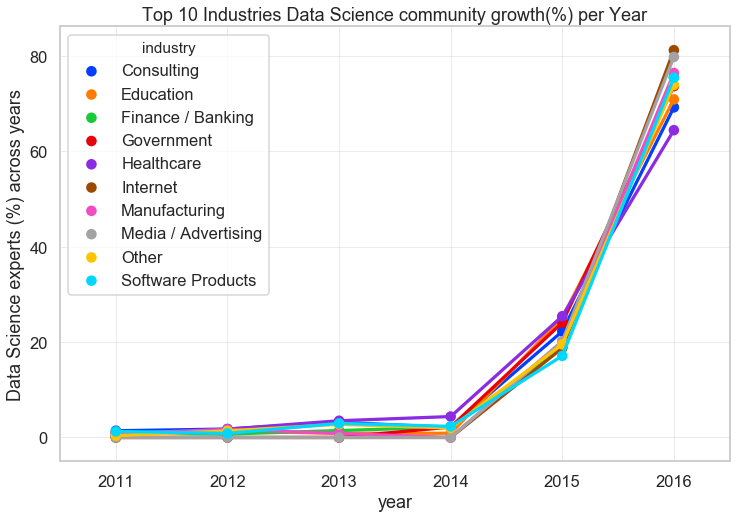

In [118]:
# Visualizing trend in proportion of Industries using Data Science across year's for each industry
feature_trend_prop(top10_industry_ds_grp, 'year', 'data_sci_perc_per_industry_across_year', 'industry',\
                    "Top 10 Industries Data Science community growth(%) per Year")

From the above visualization, we can observe the trend in growth of data science community in top 10 industries but now in terms of proportion or percentage across years for a particular industry. So, for each industry, 2011 have lowest proportion of experts and proportion of experts increased then onwards till 2018 where the proportion is maximum. So across 8 years, 2011 has the lowest proportion of data science community and 2018 has the highest proportion for each industry across 8 years and sum of proportion or percentage across 8 years for each industry is 100%. Also, rise in proportion is exponential which coincides with the data getting created within the industries over the years in an exponential manner. We can clearly see, that every top 10 industry using data science has the same pattern i.e. exponential across years but with marginal different rate.

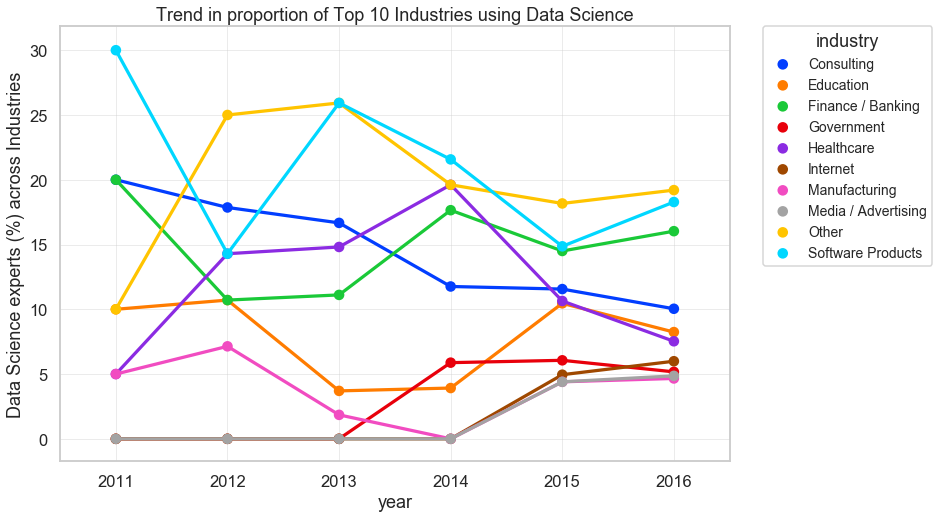

In [119]:
# Visualizing trend in proportion of Industries using Data Science across industries for each year
feature_trend_prop(top10_industry_ds_grp, 'year', 'data_sci_perc_across_industry_per_year', 'industry',\
                    "Trend in proportion of Top 10 Industries using Data Science")

From the above visualization, we can observe the following - 
* For year 2011, not all of the top 10 industries were actually using data science. 3 out of 10 industries were having 0 proportion of data science experts.
* In 2011, Software products had the highest share of data science community i.e. 30% followed by Consulting & (Finance/Banking) which had 20% share each and all of these 3 sectors/Industries took 70% of the share of proportion of data science experts. Rest of the 30% were occupied by Other & Education each with 10% share followed by Healthcare & Manufacturing each with 5% of the share of proportion.
* As the years passed by, (Media/Advertising), Internet, Government didn't had their share in proportion until 2013 or 2014.
* As the years passed by the share of proportion of data science community of top 10 industries increased & decreased over time. The difference in proportion of these industries became less across years.
* Since, other industries started to have their share in proportion, Software Products, Consulting, (Finance/Banking) lost its proportion for data science community across the years.
* Also, from the visualization, we can see that the data science experts in 'Other' industries which could mean various industries like - Research of different kinds, Medicines, Pharmaceuticals, E-commerce, Construction, Transportation, Insurance, Travel & Hospitality, Utilities, Natural resources & Energy, etc. grew more than rest of the industries and remained in the top 2 spot after 2011. That meant that the data science was being used in many other industries and was not limited to only few industries.
* After 2014, there was consistency in use of data science within each of the industries with each industry having a share from approx. 3% to 18% of the data science experts.
* Difference between proportion of industries using data science was more in 2011 and this proportion difference started to decrease across years and in 2018, the proportion difference between the industries became less which meant each of the top 10 industries was using data science but with different proportion depending upon the geographical location, need, demand & market within each of the industry.

#### Question 6

***In which companies(small, medium & large) has the Data Science community grown and in what proportion?***

In [120]:
# Getting shape of req_data_ds which has observations with data science experts i.e. 'data_sci' = 1
req_data_ds.shape

(34513, 11)

In [121]:
# Checking missing data in req_data_ds
missing_data_check(req_data_ds)

,missing_count,missing_percent
industry,31256,90.56
salary,16112,46.68
age,15171,43.96
company_size,8233,23.85
languages,5449,15.79
IT_experience,2267,6.57
job_career_satisfaction,648,1.88
data_sci,0,0.00
year,0,0.00
occupation,0,0.00


In [122]:
# Creating dataframe company_size_ds having data science experts and with no null values in feature 'company_size' 
company_size_ds = req_data_ds[req_data_ds['company_size'].notnull()]
company_size_ds.head()

,country,age,IT_experience,industry,company_size,occupation,languages,salary,job_career_satisfaction,year,data_sci
12,India,25-29,41435,Software Products,Mature Small Business (25-100),Database Administrator,C#,"$20,000 - $40,000",It pays the bills,2011,1.0
287,United States,40-50,11,Software Products,Mid Sized (100-999),Database Administrator,SQL;C#,"$100,000 - $120,000",I enjoy going to work,2011,1.0
640,United States,35-39,41435,Web Services,Mature Small Business (25-100),Database Administrator,CSS;Python;SQL,"$40,000 - $60,000",It pays the bills,2011,1.0
950,Australia,51-60,11,Finance / Banking,Start Up (1-25),Database Administrator,SQL;C;Perl;PowerBuilder,">$140,000",So happy it hurts,2011,1.0
963,United States,25-29,41435,Web Services,Mature Small Business (25-100),Database Administrator,SQL;VB.NET,"$60,000 - $80,000",I enjoy going to work,2011,1.0


In [123]:
# Finding shape of dataframe 'company_size_ds'
company_size_ds.shape

(26280, 11)

There are 24% of missing values in feature 'company_size' and have 26280 observations with non-null values in feature 'company_size' in dataframe req_data_ds where req_data_ds consists of data science experts observations only i.e. observations which have value of 1.0 in feature 'data_sci'.

In [124]:
# Finding unique values and their count in feature 'company_size' of company_size_ds
company_size_ds['company_size'].value_counts()

20 to 99 employees                       5237
100 to 499 employees                     4134
Fewer than 10 employees                  3256
10,000 or more employees                 3138
10 to 19 employees                       3001
1,000 to 4,999 employees                 2383
500 to 999 employees                     1381
5,000 to 9,999 employees                 1003
10,000+ employees                         428
100-499 employees                         388
20-99 employees                           381
1,000-4,999 employees                     305
500-999 employees                         179
1-4 employees                             168
10-19 employees                           158
5,000-9,999 employees                     129
5-9 employees                             122
I don't know                              120
I prefer not to answer                    106
I am not part of a company                 76
I am not sure                              62
Mid Sized (100-999)               

In [125]:
# Finding the total number of unique values in feature 'company_size'
company_size_ds['company_size'].value_counts().count()

32

So, we have 32 different feature values in feature 'company_size'. Out of these 32 values, 'I don't know', 'I prefer not to answer', 'I am not part of a company', 'I am not sure', 'Other (not working, consultant, etc.)' and 'Other (please specify)' are not company size. Therefore, we will remove the observations with the values 'I don't know', 'I prefer not to answer', 'I am not part of a company', 'I am not sure', 'Other (not working, consultant, etc.)' and 'Other (please specify)' in the feature 'company_size'.

In [126]:
# Finding index of rows where 'company_size' feature has values 'Other (not working, consultant, etc.)'
index_not_company_size = company_size_ds[company_size_ds['company_size'].isin(\
                                         ["I don't know","I prefer not to answer","I am not part of a company",\
                                          "I am not sure","Other (not working, consultant, etc.)",\
                                          "Other (please specify)"])].index

In [127]:
# Indexes where feature 'company_size' has value 'Other (not working, consultant, etc.)' in dataframe company_size_ds
index_not_company_size

Int64Index([  4962,   5233,   6059,  52930,  53158,  53173,  53294,  53480,
             53481,  53751,
            ...
            158190, 158204, 158646, 158763, 159316, 159447, 159742, 159800,
            159836, 159868],
           dtype='int64', length=369)

In [128]:
# Removing rows where 'company_size' feature has values 'Other (not working, consultant, etc.)'
company_size_ds = company_size_ds.drop(index = index_not_company_size)

Observations having company_size values as 'I don't know', 'I prefer not to answer', 'I am not part of a company', 'I am not sure', 'Other (not working, consultant, etc.)' and 'Other (please specify)' has been removed from company_size_ds.

In [129]:
# Finding shape of company_size_data_ds after removing rows
company_size_ds.shape

(25911, 11)

In [130]:
# Finding unique values and their count in feature 'company_size' of company_size_ds after removing unwanted
# observations 
company_size_ds['company_size'].value_counts()

20 to 99 employees                5237
100 to 499 employees              4134
Fewer than 10 employees           3256
10,000 or more employees          3138
10 to 19 employees                3001
1,000 to 4,999 employees          2383
500 to 999 employees              1381
5,000 to 9,999 employees          1003
10,000+ employees                  428
100-499 employees                  388
20-99 employees                    381
1,000-4,999 employees              305
500-999 employees                  179
1-4 employees                      168
10-19 employees                    158
5,000-9,999 employees              129
5-9 employees                      122
Mid Sized (100-999)                 22
3001                                18
1/25/2013                           16
Fortune 1000 (1,000+)               14
101-999                             13
1,000-3,000                         11
Mature Small Business (25-100)      11
Start Up (1-25)                      9
26-100                   

In [131]:
# Finding the total number of unique values in feature 'company_size' after removing 
company_size_ds['company_size'].value_counts().count()

26

So, after removing unwanted observations, we have 26 unique values of feature 'company_size'.

In [132]:
# Grouping company_size_ds by year and taking feature 'company_size' only
company_size_ds.groupby('year')['company_size'].value_counts().sort_index()

year  company_size                  
2011  Fortune 1000 (1,000+)                5
      Mature Small Business (25-100)       6
      Mid Sized (100-999)                  8
      Start Up (1-25)                      4
2012  Fortune 1000 (1,000+)                9
      Mature Small Business (25-100)       5
      Mid Sized (100-999)                 14
      Start Up (1-25)                      5
2013  1,000-3,000                         11
      1/25/2013                           16
      101-999                             13
      26-100                               6
      3001                                18
2016  1,000-4,999 employees              305
      1-4 employees                      168
      10,000+ employees                  428
      10-19 employees                    158
      100-499 employees                  388
      20-99 employees                    381
      5,000-9,999 employees              129
      5-9 employees                      122
      500-999 empl

From above, we can see that the size range of companies from 2011-2013 is different from size range of the companies from 2016-2018.

Size range of year 2013 is slightly different from 2011 & 2012 but is relatable to 2011 & 2012. So changing the names of the ranges in year 2013 to match with the ranges in year 2011 & 2012.

Therefore,
* Replacing '1/25/2013' with Start Up (1-25) as '1/25/2013' meant '1-25' in year 2013. 
* Replacing '26-100' with 'Mature Small Business (25-100)'.
* Replacing '101-999' with 'Mid Sized (100-999)'.
* Replacing '1,000-3,000' & '3001' with 'Fortune 1000 (1,000+)'.

Some of the values of feature 'company_size' from 2016-2018 are of the same range, so combining them into one feature value like - 

* Replacing '1-4 employees', '5-9 employees' to 'Fewer than 10 employees' and renaming 'Fewer than 10 employees' to '0-9 employees' 
* Replacing '10 to 19 employees' to '10-19 employees'.
* Replacing '20 to 99 employees' to '20-99 employees'.
* Replacing '100 to 499 employees' to '100-499 employees'.
* Replacing '500 to 999 employees' to '500-999 employees'. 
* Replacing '1,000 to 4,999 employees' to '1,000-4,999 employees' and renaming '1,000-4,999 employees' to '1000-4999 employees'.
* Replacing '5,000 to 9,999 employees' to '5,000-9,999 employees' and renaming '5,000-9,999 employees' to '5000-9999 employees'
* Replacing '10,000 or more employees' to '10,000+ employees' and renaming '10,000+ employees' to '10000+ employees'.


In [133]:
# Replacing few values of 'company_size' which have same range for years 2011-2013 and for years 2016-2018
# For year 2011-2013
company_size_ds.loc[company_size_ds.company_size == '1/25/2013', ['company_size']] = 'Start Up (1-25)'
company_size_ds.loc[company_size_ds.company_size == '26-100', ['company_size']] = 'Mature Small Business (25-100)'
company_size_ds.loc[company_size_ds.company_size == '101-999', ['company_size']] = 'Mid Sized (100-999)'
company_size_ds.loc[company_size_ds.company_size == '1,000-3,000', ['company_size']] = 'Fortune 1000 (1,000+)'
company_size_ds.loc[company_size_ds.company_size == '3001', ['company_size']] = 'Fortune 1000 (1,000+)'

# For year 2016-2018
company_size_ds.loc[company_size_ds.company_size == '1-4 employees',['company_size'] ] = 'Fewer than 10 employees'
company_size_ds.loc[company_size_ds.company_size == '5-9 employees', ['company_size']] = 'Fewer than 10 employees'
company_size_ds.loc[company_size_ds.company_size == '10 to 19 employees', ['company_size']] ='10-19 employees'
company_size_ds.loc[company_size_ds.company_size == '20 to 99 employees', ['company_size']] = '20-99 employees'
company_size_ds.loc[company_size_ds.company_size == '100 to 499 employees', ['company_size']] = '100-499 employees'
company_size_ds.loc[company_size_ds.company_size == '500 to 999 employees', ['company_size']] = '500-999 employees'
company_size_ds.loc[company_size_ds.company_size == '1,000 to 4,999 employees', ['company_size']] = \
                                                    '1,000-4,999 employees'
company_size_ds.loc[company_size_ds.company_size == '5,000 to 9,999 employees', ['company_size']] = \
                                                    '5,000-9,999 employees'
company_size_ds.loc[company_size_ds.company_size == '10,000 or more employees', ['company_size']] = \
                                                    '10,000+ employees'

In [134]:
# Renaming few values in company size ranges from year 2016-2018
company_size_ds.loc[company_size_ds.company_size == 'Fewer than 10 employees', ['company_size']] = \
                                                    '0-9 employees'
company_size_ds.loc[company_size_ds.company_size == '1,000-4,999 employees', ['company_size']] = \
                                                    '1000-4999 employees'
company_size_ds.loc[company_size_ds.company_size == '5,000-9,999 employees', ['company_size']] = \
                                                    '5000-9999 employees'
company_size_ds.loc[company_size_ds.company_size == '10,000+ employees', ['company_size']] = \
                                                    '10000+ employees'

In [135]:
# Grouping company_size_ds by year and taking feature 'company_size' only after replacing and renaming values
# of feature 'company_size'
company_size_ds.groupby('year')['company_size'].value_counts().sort_index()

year  company_size                  
2011  Fortune 1000 (1,000+)                5
      Mature Small Business (25-100)       6
      Mid Sized (100-999)                  8
      Start Up (1-25)                      4
2012  Fortune 1000 (1,000+)                9
      Mature Small Business (25-100)       5
      Mid Sized (100-999)                 14
      Start Up (1-25)                      5
2013  Fortune 1000 (1,000+)               29
      Mature Small Business (25-100)       6
      Mid Sized (100-999)                 13
      Start Up (1-25)                     16
2016  0-9 employees                      290
      10-19 employees                    158
      100-499 employees                  388
      1000-4999 employees                305
      10000+ employees                   428
      20-99 employees                    381
      500-999 employees                  179
      5000-9999 employees                129
2017  0-9 employees                      953
      10-19 employ

In [136]:
# Finding unique values and their count in feature 'company_size' of company_size_ds after replacing and
# renaming values of feature 'company_size'
company_size_ds['company_size'].value_counts()

20-99 employees                   5618
100-499 employees                 4522
10000+ employees                  3566
0-9 employees                     3546
10-19 employees                   3159
1000-4999 employees               2688
500-999 employees                 1560
5000-9999 employees               1132
Fortune 1000 (1,000+)               43
Mid Sized (100-999)                 35
Start Up (1-25)                     25
Mature Small Business (25-100)      17
Name: company_size, dtype: int64

In [137]:
# Finding unique values and their count in feature 'company_size' of company_size_ds after combing values of feature
# 'company_size' 
company_size_ds['company_size'].value_counts().count()

12

So, after replacing and renaming similar range values in feature 'company_size', we have 12 unique values of feature 'company_size'.

From above, we can observe that we have four categories for 'company_size' from years 2011-2013 which are different from the categories for 'company_size' from years 2016-2018. Since, we have different ranges for years 2011-2013 and years 2016-2018, we would analayse them differently to make an inference about answer to our question i.e. In which size companies(small or big) is Data Science being used and in what proportion.

So, lets make two different dataframe's for years from 2011-2013 & years from 2016-2018.

In [138]:
# Creating dataframe company_size_ds_11_to_13 with observations only from years 2011 to 2013.
company_size_ds_11_to_13 = company_size_ds[(company_size_ds['year'] == 2011) | \
                                           (company_size_ds['year'] == 2012) | \
                                           (company_size_ds['year'] == 2013)]

company_size_ds_11_to_13 = company_size_ds_11_to_13.reset_index()
company_size_ds_11_to_13 = company_size_ds_11_to_13.drop(labels = 'index', axis=1)

In [139]:
# Finding the counts of different company size's using Data Sciecnce for years 2011 to 2013
company_size_ds_11_to_13['company_size'].value_counts().sort_values(ascending=False)

Fortune 1000 (1,000+)             43
Mid Sized (100-999)               35
Start Up (1-25)                   25
Mature Small Business (25-100)    17
Name: company_size, dtype: int64

In [140]:
# Finding the proportion of different company size's using Data Sciecnce for years 2011 to 2013
round(((company_size_ds_11_to_13['company_size'].value_counts().sort_values(ascending=False)/\
company_size_ds_11_to_13['company_size'].value_counts().sort_values(ascending=False).sum())*100),2)

Fortune 1000 (1,000+)             35.83
Mid Sized (100-999)               29.17
Start Up (1-25)                   20.83
Mature Small Business (25-100)    14.17
Name: company_size, dtype: float64

In [141]:
# Function to Plot the bar chart of company size's in which Data Science is being used for specific years
def plot_bar_chart_company_size(df,feature):
    sns.set_context('talk')
    sns.set_style('darkgrid')

    ax = ((df[feature].value_counts().sort_values(ascending=True)/\
           df[feature].value_counts().sort_values(ascending=True).sum())*100).\
              plot.barh(figsize = (10, 6), fontsize = 14, color='teal', alpha=0.80)

    plt.xlabel('Percentage')
    plt.ylabel('Company Size')
    plt.xticks(rotation = 0)
    plt.legend("% of Company Size")
    if df['year'].unique().tolist() == [2011, 2012, 2013]:
        plt.title("Proportion of Company Sizes using Data Science for years 2011-2013")
    elif df['year'].unique().tolist() == [2016, 2017, 2018]:
        plt.title("Proportion of Company Sizes using Data Science for years 2016-2018")
    for p in ax.patches:
        ax.annotate(str(round(p.get_width(), 2))+ '%', (p.get_x() + p.get_width() + 0.2, p.get_y()),\
                    xytext=(0,10), textcoords='offset points', fontsize=15)
    plt.show()

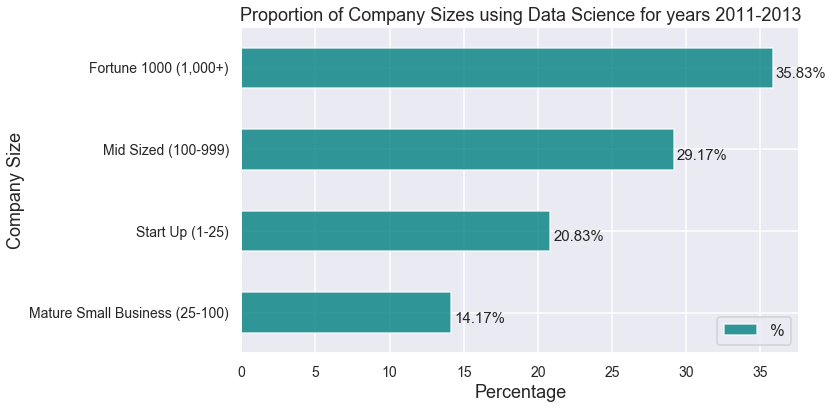

In [142]:
plot_bar_chart_company_size(company_size_ds_11_to_13,'company_size')

From the above visualization of proportion of companies with different sizes using data science for years 2011 to 2013, we can observe the following during the earlier years i.e. from 2011 to 2013 - 

Considering, Small sized companies as combination of Start Up(1-25) & Mature Small Business(25-100), Medium sized companies as Mid sized(100-999) & Large sized companies as Fortune 1000(1000+).

1) Companies(Small sized) i.e. with 1-100 employee's occupied 35% of the data science experts as compared to companies(Medium sized) with 100-999 employee's & companies(Large sized) with 1000+ employee's which occupied 29% & 36% of the share of data science experts respectively.

2) Medium sized companies had 35 data science experts for years 2011-2013 which was slightly less in comparison to Small sized companies & Large sized companies which had 42 & 43 number of data science experts respectively for years 2011-2013.

So, for years 2011-2013, there was about similar distribution of proportion of share of data science experts for years 2011-2013.

In [143]:
# Creating dataframe company_size_ds_16_to_18 with observations only from years 2016 to 2018.
company_size_ds_16_to_18 = company_size_ds[(company_size_ds['year'] == 2016) | \
                                           (company_size_ds['year'] == 2017) | \
                                           (company_size_ds['year'] == 2018)]

company_size_ds_16_to_18 = company_size_ds_16_to_18.reset_index()
company_size_ds_16_to_18 = company_size_ds_16_to_18.drop(labels = 'index', axis=1)

In [144]:
# Finding the counts of different company size's using Data Sciecnce for years 2016 to 2018
company_size_ds_16_to_18['company_size'].value_counts().sort_values(ascending=False)

20-99 employees        5618
100-499 employees      4522
10000+ employees       3566
0-9 employees          3546
10-19 employees        3159
1000-4999 employees    2688
500-999 employees      1560
5000-9999 employees    1132
Name: company_size, dtype: int64

In [145]:
# Finding the proportion of different company size's using Data Sciecnce for years 2016 to 2018
round(((company_size_ds_16_to_18['company_size'].value_counts().sort_values(ascending=False)/\
company_size_ds_16_to_18['company_size'].value_counts().sort_values(ascending=False).sum())*100),2)

20-99 employees        21.78
100-499 employees      17.53
10000+ employees       13.83
0-9 employees          13.75
10-19 employees        12.25
1000-4999 employees    10.42
500-999 employees       6.05
5000-9999 employees     4.39
Name: company_size, dtype: float64

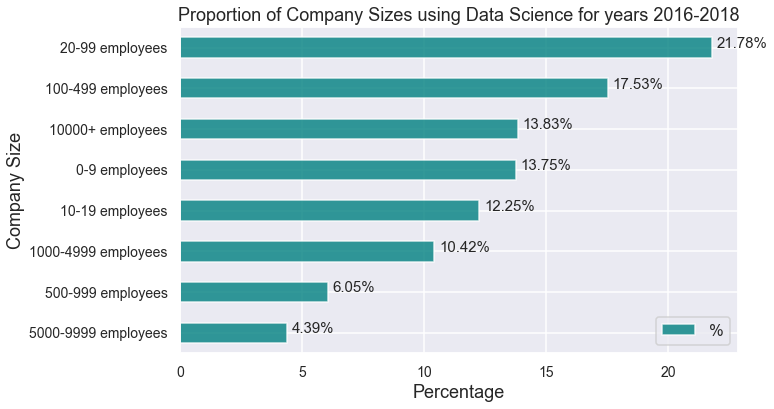

In [146]:
plot_bar_chart_company_size(company_size_ds_16_to_18,'company_size')

From the above visualization of proportion of companies with different sizes using data science for years 2016 to 2018, we can observe that during the years i.e. from 2016 to 2018, Small sized companies(0-499 employee's) were having data science experts much more than as compared to the Medium sized companies(500-4999 employee's) and large sized companies(5000-10000+ employee's). Small sized companies occupied 65% of the data science experts as compared to Medium sized & Large sized companies which occupied 16.47% & 18.22% of data science experts respectively.

So, most of the share of proportion of data science experts was with small sized(1-499 employee's) & extremely Large sized(10000+ employee's) which was 79% combined and rest of the 21% of the proportion was with companies(500-9999 employee's). So, data science experts are either with Small sized or extremely Large sized companies. 

There was an increase of percentage of data science experts in Small sized companies for the years 2016-2018 as compared to years 2011-2013 whereas percentage of data science experts in Medium sized & Large sized companies decreased for the years 2016-2018 as compared to years 2011-2013.  

Below could be the potential reasons on why it happened - 

* Since by 2016, data science has emereged has the new technology for future. So, the existing Small sized companies started hiring more and more data science experts just like large sized organisations did for years 2011-2013 in order to handle & take care of the ever increasing data and to make informed decisions in their respective businesses.

* As data science had a huge impact on every industries across the globe, new Start-Ups or Small sized companies highly equipped to handle data science requirements of various industries got emerged which hired highly trained professional having data science skill sets. These Start-Ups were willing to afford the highly priced data science experts because these small sized organisation knew the return & benefits they will reap from these hirings as data was supposed to increase in an exponential manner and demand for the services to handle& take care and make meaning of the data would also increase which would inturn benefit the Small sized companies in the long run. These led to the increase in number of data science experts in Small sized companies in comparison to number of small sized companies for years 2011-2013.

* Since, the proportion of share of data science experts increased with Small sized companies, there was a decrease in proportion of share of data science experts with Medium sized & Large sized companies.

#### Question 7

***What is the trend in Data Science community growth in various different sized companies over the years?***

In [147]:
# Creating a new dataframe company_size_ds_11_to_13_grp by grouping company_size_ds_11_to_13 by feature 'year'
# 'company_size' an dtaking only feature 'data_sci'
company_size_ds_11_to_13_grp = company_size_ds_11_to_13.groupby(['company_size','year'])['data_sci'].sum().\
                                                                                                     reset_index()
company_size_ds_11_to_13_grp.head()

,company_size,year,data_sci
0,"Fortune 1000 (1,000+)",2011,5.0
1,"Fortune 1000 (1,000+)",2012,9.0
2,"Fortune 1000 (1,000+)",2013,29.0
3,Mature Small Business (25-100),2011,6.0
4,Mature Small Business (25-100),2012,5.0


In [148]:
# Columns of datfarame company_size_ds_11_to_13_grp
company_size_ds_11_to_13_grp.columns

Index(['company_size', 'year', 'data_sci'], dtype='object')

In [149]:
# Renaming column data_sci to data_sci_count
company_size_ds_11_to_13_grp.rename(columns={'data_sci': 'data_sci_count'}, inplace=True)

In [150]:
# Getting the name of columns after renaming
company_size_ds_11_to_13_grp.columns

Index(['company_size', 'year', 'data_sci_count'], dtype='object')

In [151]:
# Finding shape ofcompany_size_ds_11_to_13_grp
company_size_ds_11_to_13_grp.shape

(12, 3)

In [152]:
# Creating two new column 'data_sci_perc_per_feature_across_year' & 'data_sci_perc_across_feature_per_year'
# to be used in visualization later on
company_size_ds_11_to_13_grp['data_sci_perc_per_company_size_across_year'] = company_size_ds_11_to_13_grp.\
                                                                             apply(make_perc_per_feature_across_year,\
                                                                             df=company_size_ds_11_to_13_grp,\
                                                                             feature='company_size',
                                                                             axis=1)
company_size_ds_11_to_13_grp['data_sci_perc_across_company_size_per_year'] = company_size_ds_11_to_13_grp.\
                                                                             apply(make_perc_across_feature_per_year,\
                                                                             df=company_size_ds_11_to_13_grp, axis=1)
company_size_ds_11_to_13_grp.head()

,company_size,year,data_sci_count,data_sci_perc_per_company_size_across_year,data_sci_perc_across_company_size_per_year
0,"Fortune 1000 (1,000+)",2011,5.0,11.63,21.74
1,"Fortune 1000 (1,000+)",2012,9.0,20.93,27.27
2,"Fortune 1000 (1,000+)",2013,29.0,67.44,45.31
3,Mature Small Business (25-100),2011,6.0,35.29,26.09
4,Mature Small Business (25-100),2012,5.0,29.41,15.15


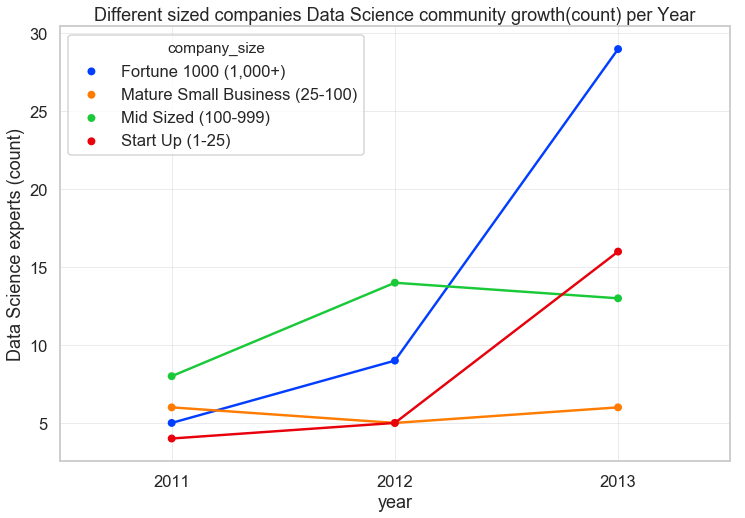

In [153]:
# Visualizing the Data Science community growth across year's for each company size for years 2011-2013
feature_growth_count(company_size_ds_11_to_13_grp, 'year', 'data_sci_count', 'company_size',\
                     'Different sized companies Data Science community growth(count) per Year')

From above visualization, we can observe that number of data science experts increased for each of the Small, Medium & Large sized companies. 

1) Start Ups(1-25 employee's) and Large sized(1000+ employee's) were focusing more on data science for years 2011-2013 in comparison to Mature Small Business(25-100 employee's) & Mid sized companies(1000+ employee's).

2) In 2011, Start Ups(1-25 employee's) and Large sized(1000+ employee's) were the  bottom two among 4 categories and in 2013, Start Ups(1-25 employee's) and Large sized(1000+ employee's) were top 2 among 4 categories. So, Increase in number for Large sized companies & Start Ups from Small sized companies was better than Mature Small Business from Small sized companies & Mid Sized companies.

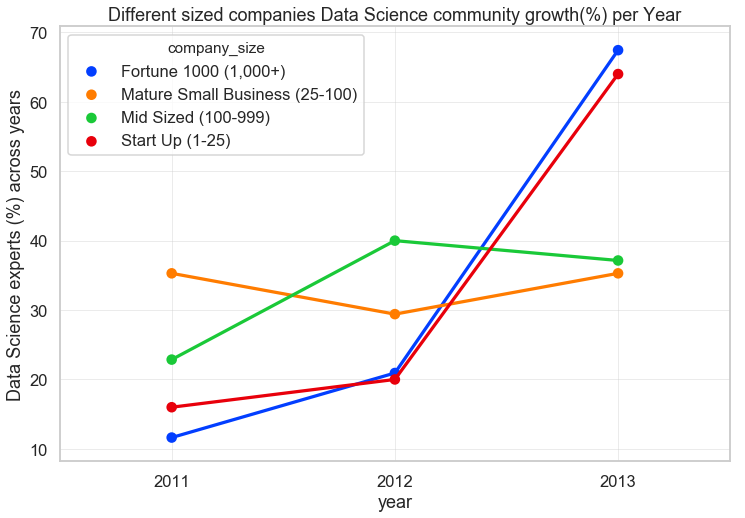

In [154]:
# Visualizing trend in proportion of different sized companies using Data Science across year's for each size company
# for years 2011-2013
feature_trend_prop(company_size_ds_11_to_13_grp, 'year', 'data_sci_perc_per_company_size_across_year', 'company_size',\
                    "Different sized companies Data Science community growth(%) per Year")

The above visualization also depicts the same that the Start Ups(1-25 employee's) and Large sized(1000+ employee's) were focusing more on data science for years 2011-2013 in comparison to Mature Small Business(25-100 employee's) & Mid sized companies(1000+ employee's).


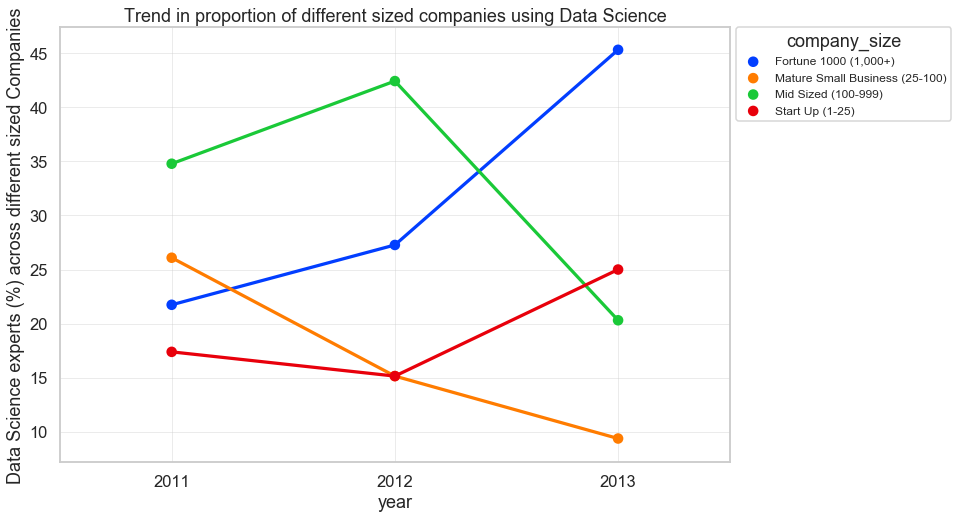

In [155]:
# Visualizing trend in proportion of different sized companies using Data Science across different sized companies for
# each year for years 2011-2013
feature_trend_prop(company_size_ds_11_to_13_grp, 'year', 'data_sci_perc_across_company_size_per_year', 'company_size',\
                    "Trend in proportion of different sized companies using Data Science")

From above visualization, we can observe the following - 

1) In 2011, Start Ups(1-25 employee's) and Large sized(1000+ employee's) were the  bottom two among 4 categories and in 2013, Start Ups(1-25 employee's) and Large sized(1000+ employee's) were top two among 4 categories. 

2) Similarly, in 2011, Mature Small Business(25-100 employee's) from Small sized companies & Mid Sized companies(100-999 employee's) were the top two among 4 categories and in 2013, Mature Small Business(25-100 employee's) from Small sized companies & Mid Sized companies(100-999 employee's) were the bottom two among 4 categories

3) So, the share of proportion of data science experts with Start Ups(1-25 employee's) and Large sized(1000+ employee's) increased over time whereas share of proportion of data science experts with Mature Small Business(25-100 employee's) from Small sized companies & Mid Sized companies(100-999 employee's) decreased over time.


* One of the potential reasons why large size companies had more data science experts is that large size companies are into the research and development and had the vision of technology which would be more productive, efficient and would be used widely in upcoming years. Since, large sized companies already knew that there woulde be an exponential increase in creation of data on a daily basis, they hired more data science experts to be better prepared to handle & take care of the data and make informed decisions in their respective businesses. On the other hand, few Start Ups got started by group of like-minded indviduals which envisioned the potential in data science being the future technology and started hiring data science experts over the period of time from 2011 to 2013. Medium sized comapnies also hired data science experts but the number of experts got up & down.


* Also, the number of data science experts during the years 2011-2013 was far less. Therefore, affordability of data science experts having rare skill sets of data science by Large sized companies was more. Start Ups were or would might had been started by data science experts themselves, so they had to hire like-minded data experts into the Start Ups. Therefore, there was increase of data science experts in Large sized comapnies & Start Ups.


* Also, the large sized organisations have huge data in comparison to other sized companies, so the demand to have data science experts was more with large sized comapanies than with other sized companies, so large sized companies hired more data science experts than other sized companies. And for Start Ups, since they were formed only due to huge potential in data science in future, more data science experts were hired into Start Ups. 

In [156]:
# Creating a new dataframe company_size_ds_16_to_18_grp by grouping company_size_ds_16_to_18 by feature 'year'
# 'company_size' an dtaking only feature 'data_sci'
company_size_ds_16_to_18_grp = company_size_ds_16_to_18.groupby(['company_size','year'])['data_sci'].sum().\
                                                                                                     reset_index()
company_size_ds_16_to_18_grp.head()

,company_size,year,data_sci
0,0-9 employees,2016,290.0
1,0-9 employees,2017,953.0
2,0-9 employees,2018,2303.0
3,10-19 employees,2016,158.0
4,10-19 employees,2017,867.0


In [157]:
# Columns of datfarame company_size_ds_16_to_18_grp
company_size_ds_16_to_18_grp.columns

Index(['company_size', 'year', 'data_sci'], dtype='object')

In [158]:
# Renaming column data_sci to data_sci_count
company_size_ds_16_to_18_grp.rename(columns={'data_sci': 'data_sci_count'}, inplace=True)

In [159]:
# Getting the name of columns after renaming
company_size_ds_16_to_18_grp.columns

Index(['company_size', 'year', 'data_sci_count'], dtype='object')

In [160]:
# Finding shape ofcompany_size_ds_11_to_13_grp
company_size_ds_16_to_18_grp.shape

(24, 3)

In [161]:
# Creating two new column 'data_sci_perc_per_feature_across_year' & 'data_sci_perc_across_feature_per_year'
# to be used in visualization later on
company_size_ds_16_to_18_grp['data_sci_perc_per_company_size_across_year'] = company_size_ds_16_to_18_grp.\
                                                                             apply(make_perc_per_feature_across_year,\
                                                                             df=company_size_ds_16_to_18_grp,\
                                                                             feature='company_size',
                                                                             axis=1)
company_size_ds_16_to_18_grp['data_sci_perc_across_company_size_per_year'] = company_size_ds_16_to_18_grp.\
                                                                             apply(make_perc_across_feature_per_year,\
                                                                             df=company_size_ds_16_to_18_grp, axis=1)
company_size_ds_16_to_18_grp.head()

,company_size,year,data_sci_count,data_sci_perc_per_company_size_across_year,data_sci_perc_across_company_size_per_year
0,0-9 employees,2016,290.0,8.18,12.84
1,0-9 employees,2017,953.0,26.88,13.44
2,0-9 employees,2018,2303.0,64.95,14.01
3,10-19 employees,2016,158.0,5.00,7.00
4,10-19 employees,2017,867.0,27.45,12.22


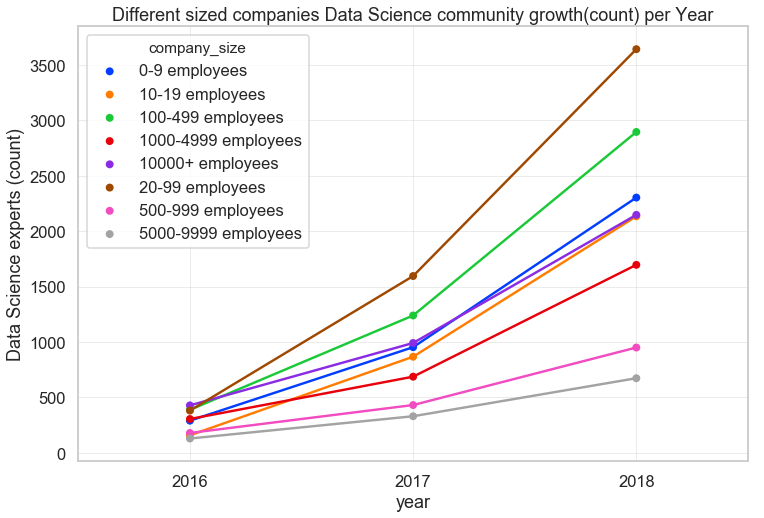

In [162]:
# Visualizing the Data Science community growth across year's for each company size for years 2016-2018 
feature_growth_count(company_size_ds_16_to_18_grp, 'year', 'data_sci_count', 'company_size',\
                     'Different sized companies Data Science community growth(count) per Year')

From above visualization, we can observe that there was rise in number of data science experts for every different sized company with each year for years 2016-2018 but the rise for Small sized(1-499 employee's) & exteremely Large sized(10000+ employee's) companies was more than rise for Medium sized(500-4999 employee's) & large sized(5000-9999) companies.

So, Small sized & extremely Large sized companies hired more data science experts during years 2016-2018.

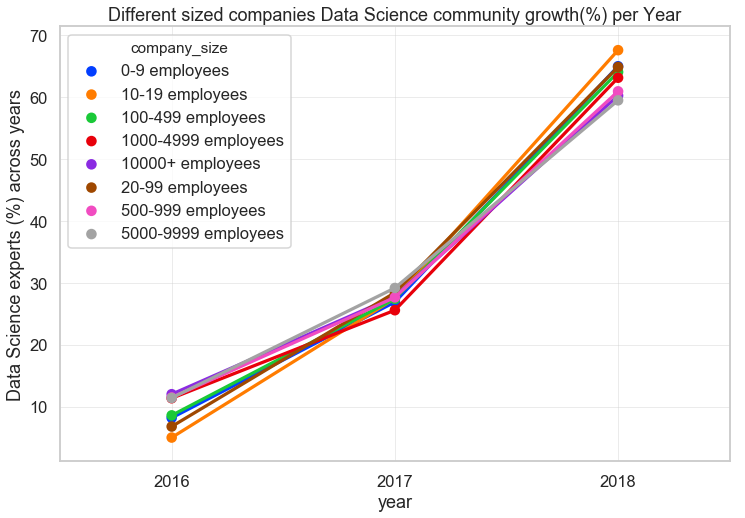

In [163]:
# Visualizing trend in proportion of different sized companies using Data Science across year's for each size company
# for years 2016-2018
feature_trend_prop(company_size_ds_16_to_18_grp, 'year', 'data_sci_perc_per_company_size_across_year', 'company_size',\
                    "Different sized companies Data Science community growth(%) per Year")

The above visualization depicts the same thing as above visualization but now in terms of proportion.

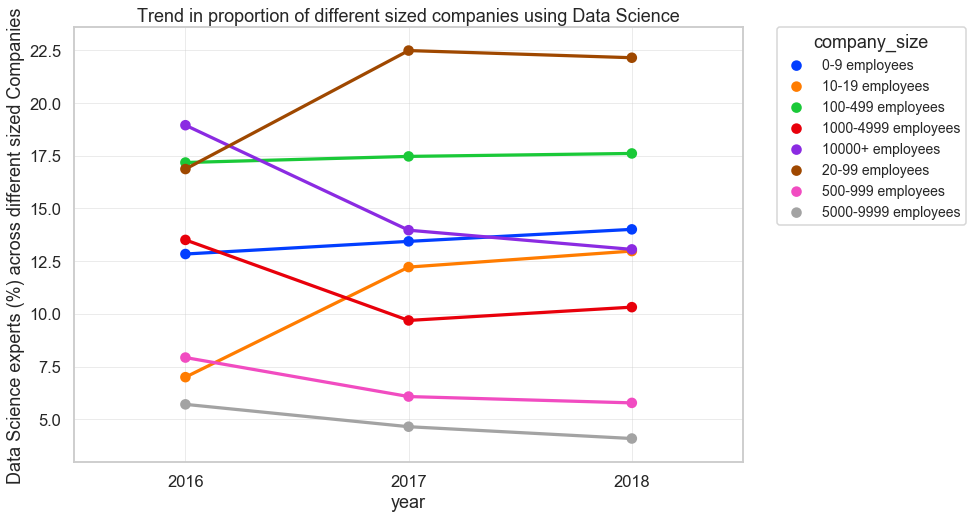

In [164]:
# Visualizing trend in proportion of different sized companies using Data Science across different sized companies for
# each year for years 2016-2018
feature_trend_prop(company_size_ds_16_to_18_grp, 'year', 'data_sci_perc_across_company_size_per_year', 'company_size',\
                    "Trend in proportion of different sized companies using Data Science")

From above visualization, we can observe the following - 

1) There is a upward trend for Small sized companies(0-9,10-19,20-99 & 100-499 employee's) across years and downward tend for Medium sized companies(500-999, 1000-4999) & Large sized companies(5000-9999, 10000+ employee's) across years. So, the porportion of data science experts with Small sized(1-499 employee's) across different sized companies increased over years from 2016-2018 while poroportion of data science experts with Medium sized(500-4999 employee's) & Large sized(5000-10000+ employee's) across different sized companies decreased over years from 2016-2018.

2) Extremely Large sized companies(10000+ employee's) were still in top 4 spots in proportion of data science experts across different sized companies for every year from years 2016-2018.

So, the Small sized companies(0-499 employee's) & extremely large sized companies(10000+ employee's) had the biggest chunk of proportion of data science experts across different sized companies for years 2016-2018.

### 5. Summary of the results of the analysis

Summary of the results of the analysis - 

1) Data Science community grew rapidly among total software developers. It was not prominent till 2014 but from 2015 grew in an **exponentially** manner. This goes in sync with data explosion which is also exponenetial & to handle and make sense of this new data getting created everyday, more and more data scientists are required. So, more jobs are being created across the globe with each passing year. Hence, the rise of data science community among the total software developers can be justified.

2) We can observe that United States lead the growth trend, followed by India, Germany, United Kingdom and so on. The trend observed in growth of Data Science community in United States is exponential and is at full boom whereas trend observed in growth of Data Science community in India, Germany & United Kingdom is also exponential but has not reached its full boom. For rest of the countries like Canada,Brazil,Russia,France,Australia & Spain, there is a rise in data science community but it is slow as compared to top 4 countries. Requirement for data science experts is growing rapidly in each of the country but at different rate as per the need, demand and market within each country.

3) Difference between proportion of countries using data science was more in 2011 and this proportion difference started to decrease across years and in 2018, the proportion difference between the countries became less which meant each of the top 10 countries was using data science but with different proportion depending upon the need, demand & market within each of the country. For year 2011, not all of the top 10 countries were actually using data science. Most of the countries were having 0 proportion of data science experts and only few countries like United States, United Kingdom, Australia & Germany had presence of data science espcially United States had 50% share of the data science experts across all of the top 10 countries. Share of United States is way more than rest of the countries in every year. In 2011, United States held about 50% of the share of the data science experts and continued to hold higher share of data science experts across different countries in each of the years. In 2018, United States held around aprrox. 38% of the share of the data science experts.



4) Almost all of the industries are using Data Science to much or less extent predominatingly used by Software products, Finance & Banking sector, Consulting, Healthcare & Education sector.
Also, from the visualization, we can see that the top most industry corresponds to 'Other' which denotes that Stack overflow survey(s) didn't had industries in which data science is being used. All industries and organisations alike are awashed with data in this pro-tech age and data is being created in an exponential manner, so Data Science is being used by every industry in different proportion as Data Science leads to Smarter Decision-Making. This requirement of more & more data science experts in each of the industries was at a different rate depending upon the need, demand, geographical location and market within each of the industries. So, after 2014, almost all of the industries were using data science.

5) For year 2011, not all of the top 10 industries were actually using data science. 3 out of 10 industries were having 0 proportion of data science experts. In 2011, Software products had the highest share of data science community i.e. 30% followed by Consulting & (Finance/Banking) which had 20% share each and all of these 3 sectors/Industries took 70% of the share of proportion of data science experts. Rest of the 30% were occupied by Other & Education each with 10% share followed by Healthcare & Manufacturing each with 5% of the share of proportion. After 2014, there was consistency in use of data science within each of the industries with each industry having a share from approx. 3% to 18% of the data science experts. Difference between proportion of industries using data science was more in 2011 and this proportion difference started to decrease across years and in 2018, the proportion difference between the industries became less which meant each of the top 10 industries was using data science but with different proportion depending upon the geographical location, need, demand & market within each of the industry.

*Since, Stack Overflow didn't had data related to company size for years 2014-2015, we used two intervals 2011-2013 & 2016-2018 to make an inference of trend of data science experts in different sized companies.*

6) For years 2011-2013, there was about similar distribution of proportion of share of data science experts among different sized organisations for years 2011-2013. There was an increase of percentage of data science experts in Small sized companies for the years 2016-2018 as compared to years 2011-2013 whereas percentage of data science experts in Medium sized & Large sized companies decreased for the years 2016-2018 as compared to years 2011-2013.

For years 2016-2018, most of the share of proportion of data science experts was with small sized(1-499 employee's) & extremely Large sized(10000+ employee's) which was 79% combined and rest of the 21% of the proportion was with companies(500-9999 employee's). So, data science experts are either with Small sized or extremely Large sized companies.

7) Start Ups(1-25 employee's) and Large sized(1000+ employee's) were focusing more on data science in comparison to Mature Small Business(25-100 employee's) & Mid sized companies(1000+ employee's) for years 2011-2013. The share of proportion of data science experts with Start Ups(1-25 employee's) and Large sized(1000+ employee's) increased over time whereas share of proportion of data science experts with Mature Small Business(25-100 employee's) from Small sized companies & Mid Sized companies(100-999 employee's) decreased over time.

The rise in number of data science experts for Small sized(1-499 employee's) & exteremely Large sized(10000+ employee's) companies was more than rise for Medium sized(500-4999 employee's) & large sized(5000-9999) companies for year 2016-2018. Extremely Large sized companies(10000+ employee's) were still in top 4 spots in proportion of data science experts across different sized companies for every year from years 2016-2018. Small sized companies(0-499 employee's) & extremely large sized companies(10000+ employee's) had the biggest chunk of proportion of data science experts across different sized companies for years 2016-2018.